## Python notebook template block B

As of now, you created a new notebook for every study day with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about NAC and the ILO's should be in this one template. Go back to the code you wrote for the previous weeks, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. You are **not** allowed to remove code blocks! All blocks in here need to be filled with code. If you did not write code for a section, leave the code block as is with the pre-filled in comment. Adjust this template to your needs, make sure that all your evidence for all of the ILO's is included.

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️

The ILO's for which you can evidence your code by this notebook are: 

| ILO | Poor | Insufficient | Sufficient | Good | Excellent |
|-----|------|--------------|------------|------|-----------|
| 4.1 | x    | x            | x          | x    | x         |
| 4.2 | x    | x            | x          | x    | x*        |
| 5.0 | x    | x            | x          | x    | x         |
| 7.0 | x    | x            | x          | x    | x         |

4.2 excellent*: If you would like to showcast your graphs using streamlit, you need to hand in a seperate .py file. Evidence accordingly in your learning log.




### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, mean_squared_error as MSE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
from scipy.cluster.vq import kmeans, vq
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sympy import *
from pyspark.sql.functions import expr
import sympy as sp
import math
from scipy.optimize import fmin
import requests
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [2]:
nacdata = pd.read_csv("../Block_B/Week_3/players_full_data.csv")
nacdata = pd.DataFrame(nacdata)
print(nacdata.shape)
nacdata.head()

(16535, 114)


,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
0,S. Baidoo,Salzburg,Liefering,"RCB, LCB",19.0,1000000,2027-06-30,21,1986,1,...,NaN,1.45,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
1,M. Seidl,Rapid Wien,Blau-Weiß Linz,"LWF, RWF, AMF",22.0,1000000,2024-06-30,26,2293,12,...,NaN,0.24,NaN,NaN,0.39,0.31,0.0,0.12,0,0.0
2,B. Okoh,Salzburg,Liefering,"LCB, RCB",20.0,1000000,2025-06-30,8,476,0,...,NaN,1.32,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
3,B. Koumetio,Austria Wien,Austria Wien II,LCB,20.0,600000,2025-06-30,4,389,0,...,NaN,3.70,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
4,M. Polster,Austria Wien,Austria Wien II,"LB, LAMF",20.0,600000,2025-06-30,5,464,1,...,NaN,0.39,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0


## Data Management and Understanding

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. This is related to the poor and insufficient criteria of ILO 4.1 and 4.2.

#### How many numerical variables are present?

In [3]:
num_variables = nacdata.count(numeric_only=1)
num_variables.sum()

1624263

#### How many categorical variables are present?

In [4]:
cat_variables = nacdata.select_dtypes(include="object").count()
cat_variables.sum()


139989

#### Check the missing values

In [5]:
missing_values = nacdata.isnull().sum()
missing_values.sum()

120738

#### General check to see the numbers above are correct

In [6]:
print(num_variables.sum() + cat_variables.sum() + missing_values.sum())
print(nacdata.shape[0]*nacdata.shape[1])

1884990
1884990


#### Cleaning the Team column

In [7]:
def change_missing_values(col_name, rep_value):
    nacdata[col_name] = nacdata[col_name].replace("", pd.NA).fillna(rep_value)
change_missing_values("Team", nacdata["Team within selected timeframe"])
print(nacdata["Team"][33])

St. Pölten


#### Cleaning the Position column

In [8]:
change_missing_values("Position", "unknown")
print(nacdata["Position"][6264])

unknown


#### Change the missing values in the Age column to the mean of the other values

In [9]:
change_missing_values("Age", nacdata["Age"].mean())
print(nacdata["Age"][7997])

25.233859744660254


#### Cleaning the Country columns

In [10]:
change_missing_values("Birth country", "unknown")
change_missing_values("Passport country", "unknown")
print(nacdata["Birth country"][11738])
print(nacdata["Passport country"][6600])

unknown
unknown


#### Changing the missing values in Foot column to unknown

In [11]:
change_missing_values("Foot", "unknown")
print(nacdata["Foot"][12])

unknown


#### Cleaning the columns connected to goalkeepers' statistics

In [12]:
change_missing_values("Conceded goals per 90", 0)
change_missing_values("Shots against per 90", 0)
change_missing_values("Prevented goals", 0)
change_missing_values("Prevented goals per 90", 0)
change_missing_values("Exits per 90", 0)
nacdata.rename(columns={"Aerial duels per 90.1": "Aerial duels per 90 (GK)"}, inplace=True)
change_missing_values("Aerial duels per 90 (GK)", 0)
#nacdata

#### Turning the NaN values to 0's

In [13]:
pd.set_option("display.max_row", None)
missing_values = nacdata.isnull().sum()
#print(missing_values)
missing_values_list_nans = missing_values.tolist()
#print(missing_values_list_nans)
missing_values_list_names = list(nacdata.columns.values)
#print(missing_values_list_names)

for i in range(len(missing_values_list_nans)):
    if missing_values_list_nans[i] == 232 or missing_values_list_nans[i] == 174 or missing_values_list_nans[i] == 1510:
        change_missing_values(missing_values_list_names[i], 0)

change_missing_values("Contract expires", "1900-01-01")

#### Check if we cleaned all the NaN values

In [14]:
missing_values = nacdata.isnull().sum()
print(missing_values)

Player                                  0
Team                                    0
Team within selected timeframe          0
Position                                0
Age                                     0
Market value                            0
Contract expires                        0
Matches played                          0
Minutes played                          0
Goals                                   0
xG                                      0
Assists                                 0
xA                                      0
Duels per 90                            0
Duels won, %                            0
Birth country                           0
Passport country                        0
Foot                                    0
Height                                  0
Weight                                  0
On loan                                 0
Successful defensive actions per 90     0
Defensive duels per 90                  0
Defensive duels won, %            

##### Fixing the 0 values in the columns "Weight" and "Height"

In [15]:
nacdata["Weight"].replace(0, np.nan, inplace=True)
 
mean_weight = nacdata["Weight"].mean()
 
nacdata["Weight"].replace(np.nan, mean_weight, inplace=True)
 
nacdata['Weight'] = nacdata['Weight'].astype(int)

nacdata["Height"].replace(0, np.nan, inplace=True)
 
mean_weight = nacdata["Height"].mean()
 
nacdata["Height"].replace(np.nan, mean_weight, inplace=True)
 
nacdata['Height'] = nacdata['Height'].astype(int)

#### Are there any duplicate rows present in the dataset? If so, how did you handle it?

In [16]:
nacdata[nacdata.duplicated()].count().sum()

0

#### Is each column in the dataset stored in the appropriate numeric format?

In [17]:
pd.set_option("display.max_row", None)
print(nacdata.dtypes)

Player                                   object
Team                                     object
Team within selected timeframe           object
Position                                 object
Age                                     float64
Market value                              int64
Contract expires                         object
Matches played                            int64
Minutes played                            int64
Goals                                     int64
xG                                      float64
Assists                                   int64
xA                                      float64
Duels per 90                            float64
Duels won, %                            float64
Birth country                            object
Passport country                         object
Foot                                     object
Height                                    int32
Weight                                    int32
On loan                                 

#### Changing the dtype of the Age column

In [18]:
nacdata["Age"] = nacdata["Age"].astype(int)
nacdata["Age"].dtypes

dtype('int32')

#### Changing the dtype of the Contract expires column

In [19]:
nacdata['Contract expires'] = pd.to_datetime(nacdata["Contract expires"], format = "%Y-%m-%d")
nacdata["Contract expires"].dtypes
#print(nacdata["Contract expires"])

dtype('<M8[ns]')

#### Changing the On loan column's data to boolean values (true or false)

In [20]:
nacdata["On loan"] = nacdata["On loan"].replace({"yes": True, "no" : False})
#nacdata["On loan"]
nacdata["On loan"].dtypes

dtype('bool')

#### Save this clean dataset to a seperate csv file

In [21]:
nacdata.to_csv("../Block_B/Week_3/cleaned_full_data.csv", index=False)

### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. This is related to the sufficient and good criteria of ILO 4.1 and 4.2. 

#### Data Selection:
First I had to merge all of the different datasets into one big one. These different datasets contained the same type of data, so this was not that difficult.
I decided to keep every data, and not to remove any of the players out of the dataset.

#### Data Cleaning:
It was a really really long process. I wanted to create a well-cleaned dataset, which I can use for my future works without any issues. I had to remove the NaN values from the dataset. For categorical features I filled them with the word 'unknown'. But for some of the numerical values I decided to fill them up with the average of the other values. I used this method for the age, weight, and height of the players. There were some statistics that goalkeepers did not have. I filled them up with 0 values. An other important thing was to check the types of the different columns. I had to fix the types of the columns Age, Contract expires, and On loan. I have changed the Age column to integers, the Contract expires column to dates, and the On loan column to booleans.

#### Data Analysis:
My goal with my analysis is to predict whether a player is a forwarder, a midfielder, a defender, or a goalkeeper based on his statistics. Why is it important? With this analysis we can help the players to get the most out of themselves. Imagine that a club has bought a player for a lot of money, but the next season the player was not performed well. Nobody knows it why, but our analysis tells us that the problem is at the position where the player is playing at his new club.

#### What is the distribution of players' positions across different teams?

In [22]:
pd.set_option("display.max_row", None)
position_df = nacdata['Position'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='Position')
team = nacdata['Team']
groupby_position = position_df.groupby([team, 'Position'])['Position'].count().sort_values(ascending=False)
groupby_position

Team                           Position
Gorica                         CF          10
Viktoria Plzeň                 CF           8
Ashdod                         RCMF         7
Hartberg                       RCMF         7
Slavia Praha                   RCMF         7
Paksi SE                       CF           7
Aris                           RB           7
FK Liepāja                     CF           7
1860 München                   CF           7
NAC Breda                      CF           6
Palermo                        CF           6
Varzim                         CF           6
Nykøbing                       RCMF         6
NAC Breda                      RCB          6
Kortrijk                       CF           6
AEL                            LCB          6
Levadiakos                     LCB          6
Anderlecht                     RCMF         6
MSV Duisburg                   AMF          6
Raufoss                        CF           6
Monopoli                       CF       

#### How does the number of goals per player vary across different positions?

In [23]:
goal_position_data = nacdata[['Goals', 'Position']]
 
position_distribution = goal_position_data.assign(Position=goal_position_data['Position'].str.split(', ')).explode('Position')
position_distribution = position_distribution.groupby('Goals')['Position'].value_counts().unstack(fill_value=0)
 
position_distribution

Position,AMF,CB,CF,DMF,GK,LAMF,LB,LCB,LCMF,LDMF,...,LWF,RAMF,RB,RCB,RCMF,RDMF,RW,RWB,RWF,unknown
Goals,,,,,,,,,,,,,,,,,,,,,
0,414,436,572,690,1274,247,1168,1232,1109,395,...,130,263,1102,1188,1145,402,453,314,135,30
1,349,271,567,337,6,203,438,568,653,212,...,107,217,483,591,647,212,388,213,132,9
2,276,98,471,151,0,157,183,248,368,98,...,97,160,186,251,362,108,269,86,113,11
3,203,49,397,72,0,128,80,107,256,58,...,88,112,77,112,229,51,187,50,90,1
4,152,22,351,33,0,81,28,40,126,37,...,66,90,35,47,111,29,144,26,61,1
5,95,8,232,12,0,65,14,12,69,11,...,52,62,20,15,66,16,99,23,43,0
6,99,3,224,6,0,48,5,6,57,11,...,40,57,9,5,53,7,71,10,33,0
7,53,1,177,4,0,47,1,2,31,2,...,30,33,3,3,21,4,42,7,27,1
8,48,0,125,5,0,27,1,0,30,4,...,23,21,3,0,18,1,32,2,17,0


#### What is the average contract duration left for players in each team?

In [24]:
nacdata['Contract expires'] = pd.to_datetime(nacdata['Contract expires'])

today = pd.to_datetime('today').normalize()

nacdata['Contract duration left'] = (nacdata['Contract expires'] - today).dt.days

positive_durations = nacdata[nacdata['Contract duration left'] > 0]

average_duration_per_team = positive_durations.groupby('Team')['Contract duration left'].mean()

average_duration_per_team = average_duration_per_team.apply(np.round)

average_duration_per_team

Team
1599 Şelimbăr                  156.0
1860 München                   289.0
ADO Den Haag                   247.0
ADO Den Haag U21               156.0
AEK Athens                     660.0
AEK Larnaca                    290.0
AEL                            249.0
AGF                            704.0
AIK                            539.0
APOEL                          265.0
ASIL Lysi                      856.0
AVS                            247.0
AZ                             754.0
AZ II                          375.0
AaB                            521.0
Aalen                          156.0
Aalesund                       620.0
Aberdeen                       324.0
Academico Viseu                587.0
Académica                      156.0
Adana Demirspor                521.0
Admira                         229.0
Ajax                           764.0
Ajax II                       1129.0
Ajax U21                       278.0
Ajka                           286.0
Akhmat Grozny                  88

#### What is the average number of matches played by players in different age groups?

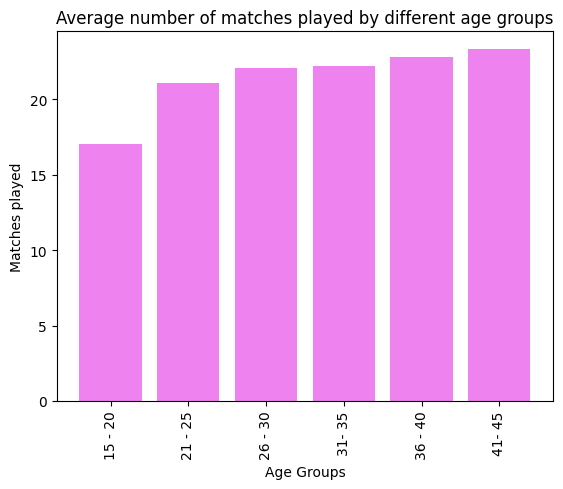

In [25]:
#creating a new column which contains the age groups for the different players
bins=[15, 20, 25, 30, 35, 40, 45]
labels=["15 - 20", "21 - 25", "26 - 30", "31- 35", "36 - 40", "41- 45"]
nacdata["Age Group"] = pd.cut(nacdata["Age"], bins=bins, labels=labels, right=True)
#print(df.head())

avg_m_played = []
for label in labels:
    matches_for_age_group = nacdata[nacdata["Age Group"] == label]["Matches played"]
    avg_m_played.append(matches_for_age_group.mean())

#print(avg_m_played)

y = avg_m_played
x = labels

plt.bar(x, y, color = "violet")
plt.title("Average number of matches played by different age groups")
plt.ylabel('Matches played')
plt.xlabel('Age Groups')
plt.xticks(rotation=90)
plt.show()

#### What is the distribution of ‘Yellow cards per 90' and ‘Red cards per 90' across different positions?

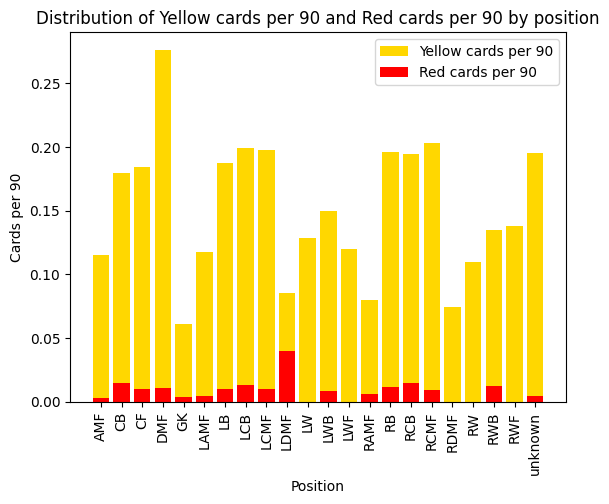

In [26]:
grouped_position = nacdata.groupby('Position')[['Yellow cards per 90', 'Red cards per 90']].mean().reset_index()
position_df = nacdata['Position'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='Position')
groupby_position = position_df.groupby('Position').size().reset_index(name='Position Count')

merged_df = pd.merge(grouped_position, groupby_position, on='Position')

plt.bar(merged_df["Position"], merged_df["Yellow cards per 90"], color="gold")
plt.bar(merged_df["Position"], merged_df["Red cards per 90"], color="red")
plt.title("Distribution of Yellow cards per 90 and Red cards per 90 by position")
plt.xlabel("Position")
plt.ylabel("Cards per 90")
plt.xticks(rotation=90)
plt.legend(["Yellow cards per 90", "Red cards per 90"])
plt.show()

### Visualizations

Include all the visualizations you made in this section. This is related to the excellent criteria of ILO 4.2. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

❗ If you would like to showcast your visualizations using streamlit, you need to hand in a seperate .py file for this. It is not possible to run streamlit code from a python notebook. Please note down below if you do so.

#### I handed in a seperate .py file called "app". It is my visualization using streamlit. You can reach this file on the following link:
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-MarkMolnar232926/blob/main/Block_B/Deliverables/app.py

#### How does the market value of players correlate with their age?

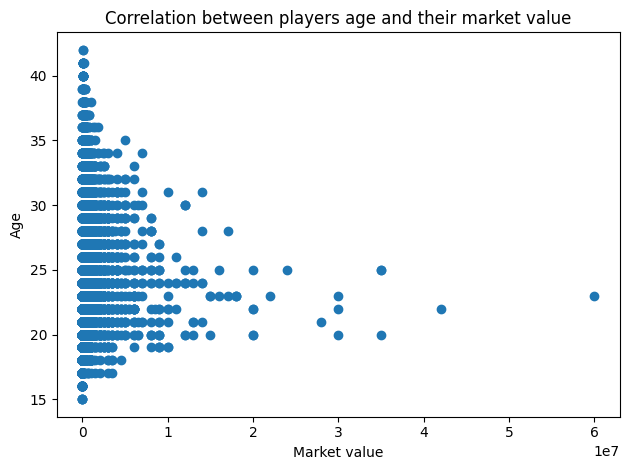

In [27]:
fig, ax = plt.subplots(sharey=True, tight_layout=True)
ax.scatter(nacdata["Market value"], nacdata["Age"])
plt.xlabel('Market value')
plt.ylabel('Age')
plt.title('Correlation between players age and their market value')
 
plt.show()

#### How do ‘Duels won %' and ‘Aerial duels won %' vary by position?

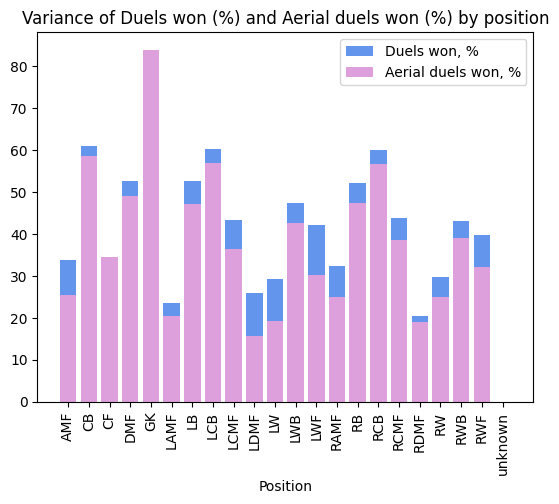

In [28]:
grouped_position = nacdata.groupby('Position')[['Duels won, %', 'Aerial duels won, %']].mean().reset_index()
position_df = nacdata['Position'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='Position')
groupby_position = position_df.groupby('Position').size().reset_index(name='Position Count')

merged_df = pd.merge(grouped_position, groupby_position, on='Position')
#print(merged_df)

plt.bar(merged_df["Position"], merged_df["Duels won, %"], color="cornflowerblue")
plt.bar(merged_df["Position"], merged_df["Aerial duels won, %"], color="plum")
plt.title("Variance of Duels won (%) and Aerial duels won (%) by position")
plt.xlabel("Position")
plt.xticks(rotation=90)
plt.legend(["Duels won, %", "Aerial duels won, %"])
plt.show()

#### Is there a significant difference in ‘Successful defensive actions per 90' between players on loan and permanent players?

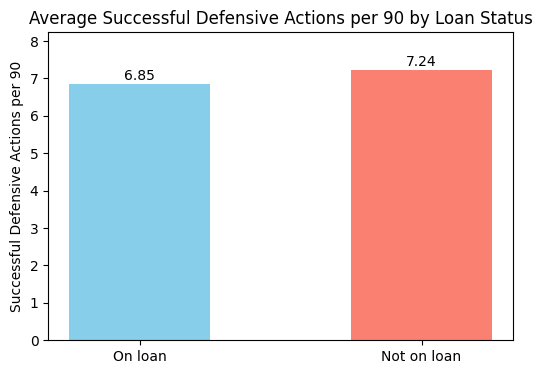

In [29]:
on_loan_true = []
on_loan_false = []
for i in range(len(nacdata["On loan"])):
    if nacdata["On loan"][i] == True:
        on_loan_true.append(nacdata["Successful defensive actions per 90"][i])
    else:
        on_loan_false.append(nacdata["Successful defensive actions per 90"][i])
olt_avg = sum(on_loan_true) / len(on_loan_true)
olf_avg = sum(on_loan_false) / len(on_loan_false)
#print(olt_avg)
#print(olf_avg)

x = ["On loan", "Not on loan"]
y = [olt_avg, olf_avg]

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x, y, color=["skyblue", "salmon"], width=0.5)

for i, v in enumerate(y):
    ax.text(i, v + 0.1, f"{v:.2f}", color='black', ha='center')

ax.set_title("Average Successful Defensive Actions per 90 by Loan Status")
ax.set_ylabel("Successful Defensive Actions per 90")
plt.ylim(0, max(y) + 1) 
plt.show()

#### What is the relationship between ‘Goals per 90' and ‘Assists per 90' for forwards?

##### First lets make different lists based on positions

In [30]:
forwards = ['CF', 'LW', 'RW', 'LWF', 'RWF']
midfielders = ['AMF', 'DMF', 'LAMF', 'LCMF', 'LDMF', 'RAMF', 'RCMF', 'RDMF']
defenders = ['CB', 'LB', 'LCB', 'RB', 'RCB', 'LWB', 'RWB']
goalkeeper = ['GK']

##### Now, answer the question

In [31]:
forwards_names = []
goals_per_90_f = []
assists_per_90_f = []

for i in range(len(nacdata["Position"])):
    for j in range(len(forwards)):
        if nacdata["Position"][i].split(",")[0] == forwards[j]:
            forwards_names.append(nacdata["Player"][i])
            goals_per_90_f.append(nacdata["Goals per 90"][i])
            assists_per_90_f.append(nacdata["Assists per 90"][i])
#print(len(forwards_names))
#print(len(goals_per_90_f))
#print(len(assists_per_90_f))

##### And visualize it using a scatter plot

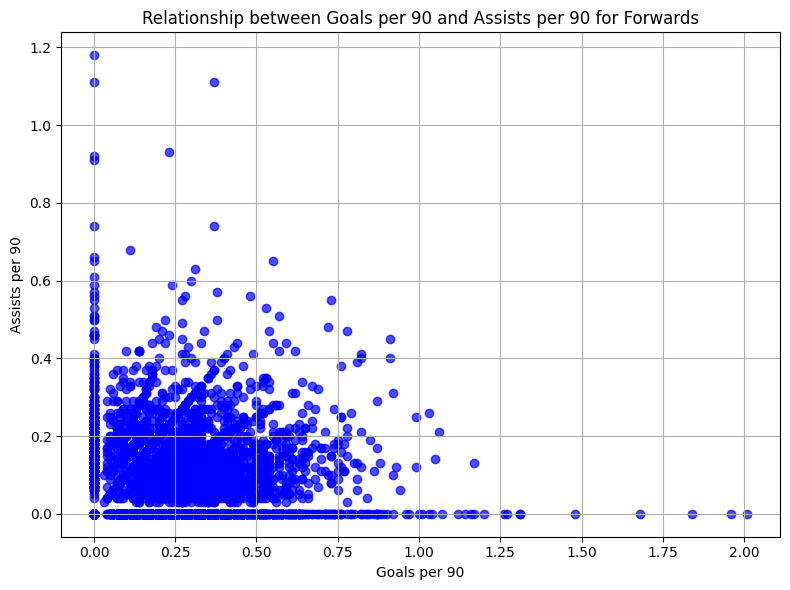

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(goals_per_90_f, assists_per_90_f, color='blue', alpha=0.7)
plt.title('Relationship between Goals per 90 and Assists per 90 for Forwards')
plt.xlabel('Goals per 90')
plt.ylabel('Assists per 90')
plt.grid(True)
plt.tight_layout()
plt.show()

#### How do ‘Passes per 90' and ‘Accurate passes %' correlate for midfielders?

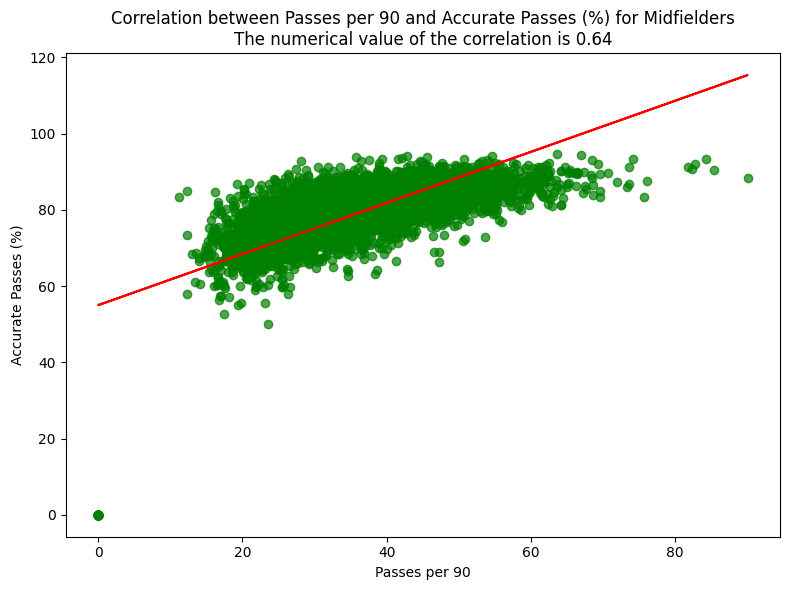

In [33]:
midfielders_names = []
passes_per_90_m = []
accurate_passes_m = []

for i in range(len(nacdata["Position"])):
    for j in range(len(midfielders)):
        if nacdata["Position"][i].split(",")[0] == midfielders[j]:
            midfielders_names.append(nacdata["Player"][i])
            passes_per_90_m.append(nacdata["Passes per 90"][i])
            accurate_passes_m.append(nacdata["Accurate passes, %"][i])
#print(len(midfielders_names))
#print(len(passes_per_90_m))
#print(len(accurate_passes_m))

plt.figure(figsize=(8, 6))
plt.scatter(passes_per_90_m, accurate_passes_m, color='green', alpha=0.7)

slope, intercept = np.polyfit(passes_per_90_m, accurate_passes_m, 1)
plt.plot(np.array(passes_per_90_m), slope * np.array(passes_per_90_m) + intercept, color='red', linestyle='-')

correlation_coefficient, _ = pearsonr(passes_per_90_m, accurate_passes_m)
correlation_text = f'The numerical value of the correlation is {correlation_coefficient:.2f}'

plt.title('Correlation between Passes per 90 and Accurate Passes (%) for Midfielders\n' + correlation_text)
plt.xlabel('Passes per 90')
plt.ylabel('Accurate Passes (%)')
plt.tight_layout()
plt.show()

#### Is there a trend in the ‘Save rate %' for goalkeepers across different age groups?

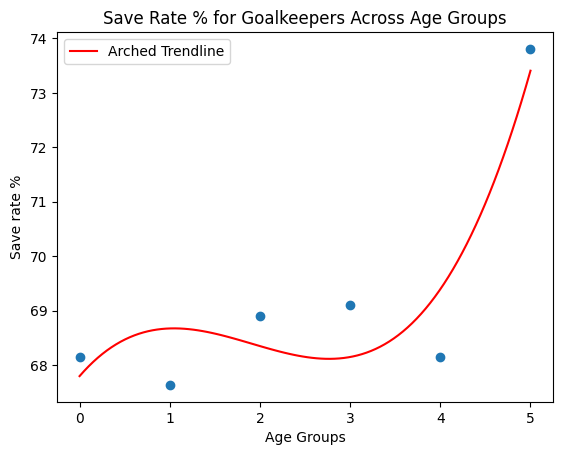

In [34]:
save_rate = []
labels = ["15 - 20", "21 - 25", "26 - 30", "31- 35", "36 - 40", "41- 45"]  # Assuming you have these labels defined

for label in labels:
    save_rate_for_age_group = nacdata[(nacdata["Position"] == "GK") & (nacdata["Age Group"] == label)]["Save rate, %"]
    save_rate.append(save_rate_for_age_group.mean())

#print(save_rate)

#plt.scatter(labels, save_rate)
#plt.show()
#plt.plot(labels, save_rate)
#plt.show()

x = np.arange(len(labels))
y = save_rate

plt.scatter(x, y)

z = np.polyfit(x, y, 3) 
p = np.poly1d(z)

x_smooth = np.linspace(x.min(), x.max(), 100)

y_smooth = p(x_smooth)

plt.plot(x_smooth, y_smooth, color='red', label='Arched Trendline')
plt.legend()

plt.xlabel('Age Groups')
plt.ylabel('Save rate %')
plt.title('Save Rate % for Goalkeepers Across Age Groups')

plt.show()

#### How does ‘Fouls suffered per 90' compare for attackers and defenders?

In [35]:
forwards_names = []
fs_per_90_f = []

for i in range(len(nacdata["Position"])):
    for j in range(len(forwards)):
        if nacdata["Position"][i].split(",")[0] == forwards[j]:
            forwards_names.append(nacdata["Player"][i])
            fs_per_90_f.append(nacdata["Fouls suffered per 90"][i])
#print(len(forwards_names))
#print(len(fs_per_90_f))

defenders_names = []
fs_per_90_d = []

for i in range(len(nacdata["Position"])):
    for j in range(len(defenders)):
        if nacdata["Position"][i].split(",")[0] == defenders[j]:
            defenders_names.append(nacdata["Player"][i])
            fs_per_90_d.append(nacdata["Fouls suffered per 90"][i])
#print(len(defenders_names))
#print(len(fs_per_90_d))

##### Visualize using box plot (the dots outside the box plot considered as outliers)

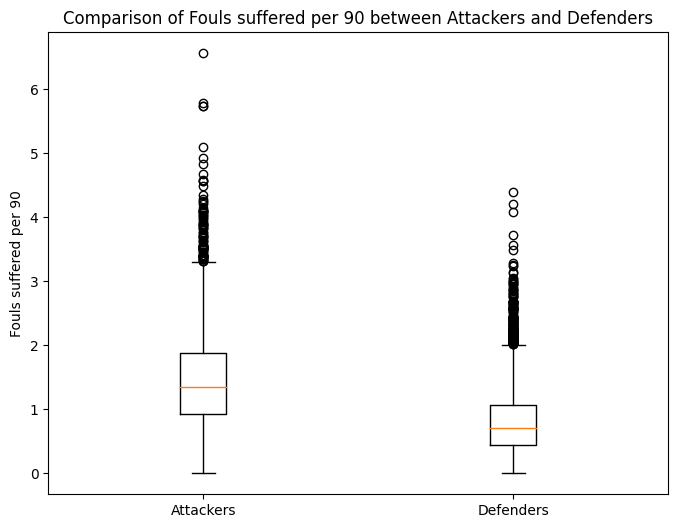

In [36]:
plt.figure(figsize=(8, 6))
plt.boxplot([fs_per_90_f, fs_per_90_d], labels=['Attackers', 'Defenders'])
plt.ylabel('Fouls suffered per 90')
plt.title('Comparison of Fouls suffered per 90 between Attackers and Defenders')
plt.show()

#### The distribution of the goalscorers in NAC Breda (using pie chart)

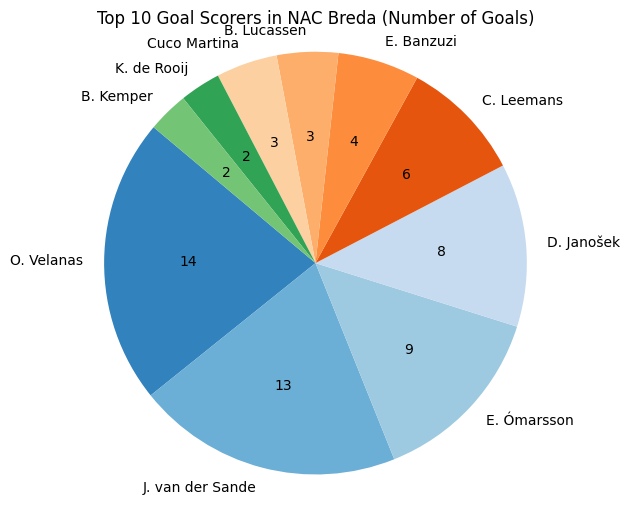

In [37]:
scorers = []
number_of_goals = []
for i in range(len(nacdata["Team"])):
    if nacdata["Team"][i] == "NAC Breda" and nacdata["Goals"][i] > 0:
        scorers.append(nacdata["Player"][i])
        number_of_goals.append(nacdata["Goals"][i])

for_df_pie_chart = {"Player": scorers, "Number of goals": number_of_goals}
df_pie_chart = pd.DataFrame(for_df_pie_chart).sort_values(by=["Number of goals"], ascending = False)
#print(df_pie_chart)
df_pie_chart_top5 = df_pie_chart[:5]
#print(df_pie_chart_top5)

scorers, number_of_goals = zip(*sorted(zip(scorers, number_of_goals), key=lambda x: x[1], reverse=True))

fig, ax1 = plt.subplots(figsize=(6, 6))

top_scorers = scorers[:10]
top_goals = number_of_goals[:10]

colors = plt.cm.tab20c.colors[:len(top_scorers)]

patches, texts, _ = ax1.pie(top_goals, labels=top_scorers, startangle=140, colors=colors,
                            autopct=lambda p: f'{int(p * sum(top_goals) / 100)}' if p > 0 else '',
                            textprops=dict(color="black"))

for text in texts:
    text.set_fontsize(10)

ax1.axis('equal')
ax1.set_title("Top 10 Goal Scorers in NAC Breda (Number of Goals)")

plt.show()

#### The distribution of the top 5 goalscorers in NAC Breda (using pie chart)

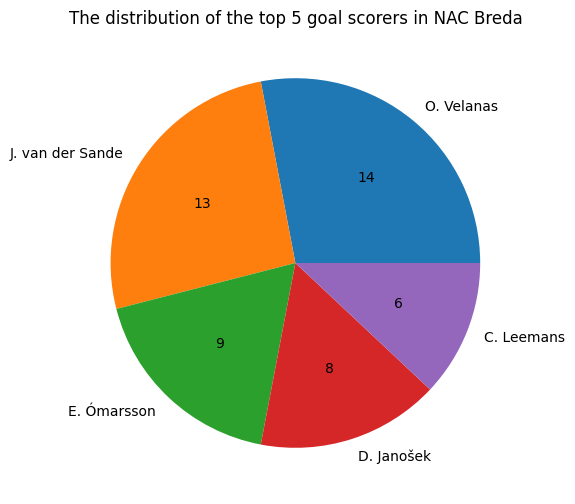

In [38]:
fig, ax2 = plt.subplots(figsize=(6, 6))
ax2.pie(df_pie_chart_top5["Number of goals"], labels=df_pie_chart_top5["Player"], autopct=lambda p: "{:.0f}".format(p * sum(df_pie_chart_top5["Number of goals"]) /100))
ax2.set_title("The distribution of the top 5 goal scorers in NAC Breda")
plt.show()


#### Market value of the top 5 goal scorers in NAC Breda (using bar chart)

C:\Users\Mark\AppData\Local\Temp\ipykernel_24848\2244002523.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pie_chart_top5["Market value"] = market_value


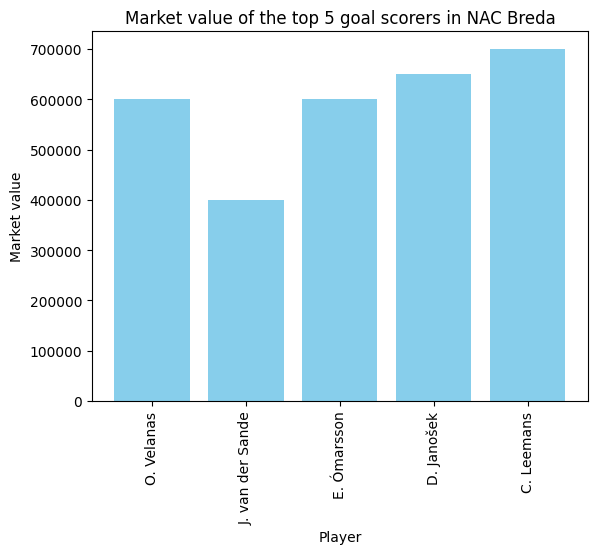

In [39]:
list_of_top5 = df_pie_chart_top5.values.tolist()
#print(list_of_top5)

market_value = []
for i in range(len(list_of_top5)):
    for j in range(len(nacdata["Market value"])):
        if list_of_top5[i][0] == nacdata["Player"][j]:
            market_value.append(nacdata["Market value"][j])
            break
#print(market_value)

df_pie_chart_top5["Market value"] = market_value

x = df_pie_chart_top5["Player"]
y = df_pie_chart_top5["Market value"]
 
plt.bar(x, y, color = "skyblue")
plt.title("Market value of the top 5 goal scorers in NAC Breda")
plt.ylabel('Market value')
plt.xlabel('Player')
plt.xticks(rotation=90)
plt.show()

#### xG per 90 of the top 5 goal scorers in NAC Breda (using bar chart)

C:\Users\Mark\AppData\Local\Temp\ipykernel_24848\4081986527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pie_chart_top5["xG per 90"] = xg_per_90


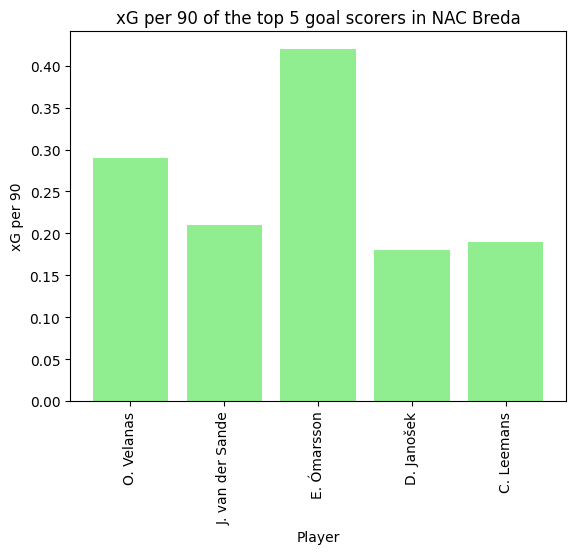

In [40]:
xg_per_90 = []
for i in range(len(list_of_top5)):
    for j in range(len(nacdata["xG"])):
        if list_of_top5[i][0] == nacdata["Player"][j]:
            xg_per_90.append(nacdata["xG per 90"][j])
            break
#print(xg_per_90)

df_pie_chart_top5["xG per 90"] = xg_per_90

x = df_pie_chart_top5["Player"]
y = df_pie_chart_top5["xG per 90"]
 
plt.bar(x, y, color = "lightgreen")
plt.title("xG per 90 of the top 5 goal scorers in NAC Breda")
plt.ylabel('xG per 90')
plt.xlabel('Player')
plt.xticks(rotation=90)
plt.show()

#### The number of yellow cards per 90 and fouls per 90 of the top 5 goal scorers in NAC Breda (using stacked bar chart)

C:\Users\Mark\AppData\Local\Temp\ipykernel_24848\1372812259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pie_chart_top5["Fouls per 90"] = fouls_per_90
C:\Users\Mark\AppData\Local\Temp\ipykernel_24848\1372812259.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pie_chart_top5["Yellow cards per 90"] = yellow_cards_per_90


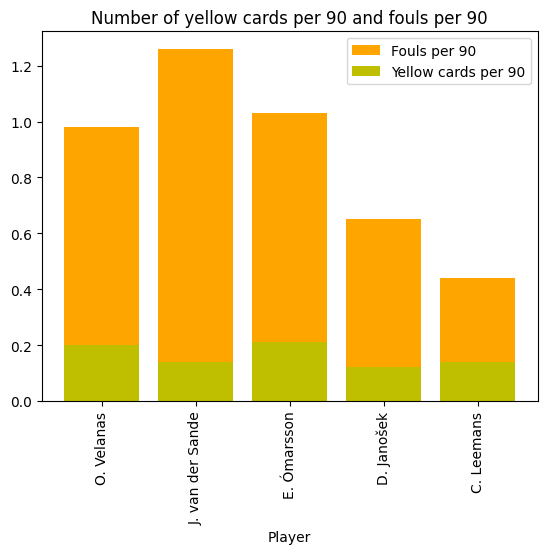

In [41]:
yellow_cards_per_90 = []
fouls_per_90 = []
for i in range(len(list_of_top5)):
    for j in range(len(nacdata["Yellow cards per 90"])):
        if list_of_top5[i][0] == nacdata["Player"][j]:
            yellow_cards_per_90.append(nacdata["Yellow cards per 90"][j])
            fouls_per_90.append(nacdata["Fouls per 90"][j])
            break
#print(yellow_cards_per_90, fouls_per_90)

df_pie_chart_top5["Fouls per 90"] = fouls_per_90
df_pie_chart_top5["Yellow cards per 90"] = yellow_cards_per_90

plt.bar(df_pie_chart_top5["Player"], df_pie_chart_top5["Fouls per 90"], color="orange")
plt.bar(df_pie_chart_top5["Player"], df_pie_chart_top5["Yellow cards per 90"], color="y")
plt.title("Number of yellow cards per 90 and fouls per 90")
plt.xlabel("Player")
plt.xticks(rotation=90)
plt.legend(["Fouls per 90", "Yellow cards per 90"])
plt.show()

### Database and ETL

Include all the python code and explanations on your RESTful API and database operations in this section. This is related to the excellent criteria of ILO 4.1.

❗ These code you cannot showcast using the NAC data. Use the data provided for the homework and datalab preperation of these modules.

In [42]:
response = requests.get("https://api.thecatapi.com/v1/breeds")
response.text

'[{"weight":{"imperial":"7  -  10","metric":"3 - 5"},"id":"abys","name":"Abyssinian","cfa_url":"http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx","vetstreet_url":"http://www.vetstreet.com/cats/abyssinian","vcahospitals_url":"https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian","temperament":"Active, Energetic, Independent, Intelligent, Gentle","origin":"Egypt","country_codes":"EG","country_code":"EG","description":"The Abyssinian is easy to care for, and a joy to have in your home. They’re affectionate cats and love both people and other animals.","life_span":"14 - 15","indoor":0,"lap":1,"alt_names":"","adaptability":5,"affection_level":5,"child_friendly":3,"dog_friendly":4,"energy_level":5,"grooming":1,"health_issues":2,"intelligence":5,"shedding_level":2,"social_needs":5,"stranger_friendly":5,"vocalisation":1,"experimental":0,"hairless":0,"natural":1,"rare":0,"rex":0,"suppressed_tail":0,"short_legs":0,"wikipedia_url":"https://en.wikipedia.org/wiki/Abyssinian_(cat)","hypoallerg

In [43]:
response.headers

{'x-dns-prefetch-control': 'off', 'x-frame-options': 'SAMEORIGIN', 'strict-transport-security': 'max-age=15552000; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'vary': 'Origin', 'pagination-count': '67', 'pagination-page': '0', 'pagination-limit': '1000', 'access-control-expose-headers': 'Pagination-Count, Pagination-Page, Pagination-Limit', 'content-type': 'application/json; charset=utf-8', 'x-response-time': '1ms', 'X-Cloud-Trace-Context': '42d4330c2d99b0694ff6712ef2d13e21', 'Date': 'Fri, 26 Jan 2024 14:21:10 GMT', 'Server': 'Google Frontend', 'Content-Length': '76734'}

In [44]:
response.request

<PreparedRequest [GET]>

In [45]:
request = response.request
request.url

'https://api.thecatapi.com/v1/breeds'

In [46]:
request.path_url

'/v1/breeds'

In [47]:
request.method

'GET'

In [48]:
request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [49]:
response.status_code

200

In [50]:
response.reason

'OK'

In [51]:
response = requests.get("https://api.thecatapi.com/v1/breedz")
response
response.status_code
response.reason

'Not Found'

In [52]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers
response.request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [53]:
headers = {"X-Request-Id": "<my-request-id>"}
response = requests.get("https://example.org", headers=headers)
response.request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive', 'X-Request-Id': '<my-request-id>'}

In [54]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers.get("Content-Type")

'application/json; charset=utf-8'

In [55]:
url = "https://image-charts.com/chart?chs=700x125&cht=ls&chd=t:23,15,28"
response = requests.get(url)
response
response.headers.get("Content-Type")

'image/png'

In [56]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers.get("Content-Type")
response.content

b'{"weight":{"imperial":"7  -  10","metric":"3 - 5"},"id":"abys","name":"Abyssinian","cfa_url":"http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx","vetstreet_url":"http://www.vetstreet.com/cats/abyssinian","vcahospitals_url":"https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian","temperament":"Active, Energetic, Independent, Intelligent, Gentle","origin":"Egypt","country_codes":"EG","country_code":"EG","description":"The Abyssinian is easy to care for, and a joy to have in your home. They\xe2\x80\x99re affectionate cats and love both people and other animals.","life_span":"14 - 15","indoor":0,"lap":1,"alt_names":"","adaptability":5,"affection_level":5,"child_friendly":3,"dog_friendly":4,"energy_level":5,"grooming":1,"health_issues":2,"intelligence":5,"shedding_level":2,"social_needs":5,"stranger_friendly":5,"vocalisation":1,"experimental":0,"hairless":0,"natural":1,"rare":0,"rex":0,"suppressed_tail":0,"short_legs":0,"wikipedia_url":"https://en.wikipedia.org/wiki/Abyssinian_(cat)",

In [57]:
response = requests.get("https://api.thecatapi.com/v1/breeds/abys")
response.headers.get("Content-Type")
response.json()
response.json()["name"]

'Abyssinian'

In [58]:
url = "https://image-charts.com/chart?chs=700x125&cht=ls&chd=t:23,15,28"
response = requests.get(url)
response

response.headers.get("Content-Type")

response.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc\x00\x00\x00}\x08\x02\x00\x00\x00\xcf\xf3\',\x00\x00\r\xd8IDATx\xda\xed\xdd\xcboT\xd7\x01\x80\xf1s\xc6\xf81\xef\x87\x8dg\\\x1a\x11\x88\x8d \x9b\x00&\xabF(Q\x14\xb5\xcb.\x10\xb1\x13\xda\xb0\x8c\x92\n\x95\xa8ib\x036\t~\x88\x02^5RXV\xd9%\x1b\xc8\x7f\x90J\xe9\x82\x14\x89$\x80L\xf3\xa2\x11\xe0\xb1=/\xcf\xdb\xf6\xcc=\xd5\xb9w<3~\x86P\x9bx<\xdfO\xd6\xd5\\\x03\x03\x0c~|\x9c{\xce\xb9R)%\x00\x00\x00~\x8a$\x1a\x00\x00\x00\xd1\x00\x00\xc0\xc6\xca\xe7\xf3G\x8f\x1e=s\xe6\xcc\xb3\xcf>\xbb\xa1\xbfQ6\x9b\xed\xe9\xe9\x19\x18\x188t\xe8\xd0\xda?\xf3\xda\xb5kCCC\x9f|\xf2Iss3\xd1\x00\x00\xc0fa\x18\xc6\xf5\xeb\xd7\xf7\xec\xd9\xe3\xf5z\x89\x06\x00\x00\xb0\xaa\xf2H\xc3\xd7_\x7f}\xe5\xca\x95\xf2\xfb\x9f\x7f\xfe\xf9\xb7\xdezK\x08199\xd9\xdf\xdf?==\xdd\xd9\xd9966\xb6\xe2i{{\xfb\xe8\xe8\xe8\xf2\'\x7f\xf0\xe0\xc1\x993g\x82\xc1\xe0\xd0\xd0P>\x9f\xef\xe9\xe9\x11B\xbc\xf0\xc2\x0b\'O\x9e\x14B\x84\xc3\xe1S\xa7NMOOwuu]\xbat)\x95J\xf5\xf7\xf7www?\xfd\xf4\xd3CCCB\x08\xab

In [59]:
with open("chart.png", mode="wb") as file:
    file.write(response.content)

In [60]:
requests.post("https://api.thecatapi.com/v1/breeds/abys")

requests.get("https://api.thecatapi.com/v1/breeds/abys")

requests.put("https://api.thecatapi.com/v1/breeds/abys")

requests.delete("https://api.thecatapi.com/v1/breeds/abys")

<Response [405]>

In [61]:
requests.get("https://randomuser.me/api/").json()
requests.get("https://randomuser.me/api/?gender=female").json()
requests.get("https://randomuser.me/api/?gender=female&nat=de").json()

{'results': [{'gender': 'female',
   'name': {'title': 'Miss', 'first': 'Francesca', 'last': 'Siegmund'},
   'location': {'street': {'number': 4450, 'name': 'Danziger Straße'},
    'city': 'Furtwangen im Schwarzwald',
    'state': 'Niedersachsen',
    'country': 'Germany',
    'postcode': 12955,
    'coordinates': {'latitude': '63.2927', 'longitude': '-67.0404'},
    'timezone': {'offset': '+1:00',
     'description': 'Brussels, Copenhagen, Madrid, Paris'}},
   'email': 'francesca.siegmund@example.com',
   'login': {'uuid': 'd1773480-8b03-4740-9e3d-2b2824492a61',
    'username': 'blueswan242',
    'password': 'tabatha',
    'salt': 'HTanDsa2',
    'md5': '163e2a6a27c936641c3b289ebe794187',
    'sha1': '7d15a202fd2d72c3c0fad2972faad99162412cee',
    'sha256': '70b3486e3f14f03897ebdae7e00b8605228ef51f6bc193e90ae2c465e9944d20'},
   'dob': {'date': '1984-12-25T05:08:43.513Z', 'age': 39},
   'registered': {'date': '2004-09-30T17:53:19.390Z', 'age': 19},
   'phone': '0123-6164178',
   'cell'

In [62]:
query_params = {"gender": "female", "nat": "de"}
response = requests.get("https://randomuser.me/api/", params=query_params)

if response.status_code == 200:
    data = response.json()
    # Process the data as needed
else:
    print(f"Error: {response.status_code}")

In [63]:
query_params = {"q": "ragamuffin"}
endpoint = "https://api.thecatapi.com/v1/breeds/search"
response = requests.get(endpoint, params=query_params)

if response.status_code == 200:
    data = response.json()
    # Process the data as needed
else:
    print(f"Error: {response.status_code}")

In [64]:
endpoint = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
api_key = "DEMO_KEY"
query_params = {"api_key": api_key, "earth_date": "2020-07-01"}
response = requests.get(endpoint, params=query_params)
response

<Response [200]>

In [65]:
response.json()
photos = response.json()["photos"]
print(f"Found {len(photos)} photos")
photos[4]["img_src"]

Found 12 photos


'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02809/opgs/edr/rcam/RRB_646869036EDR_F0810628RHAZ00337M_.JPG'

In [66]:
""" CLIENT_ID = "d1f11be928fc5d08d9e1"
CLIENT_SECRET = "f22dfd1132fb6c865b258bd74e77be5127186c7b"
REDIRECT_URI = "https://football-mania.com/"

def create_oauth_link():
    params = {
        "client_id": CLIENT_ID,
        "redirect_uri": REDIRECT_URI,
        "scope": "user",
        "response_type": "code",
    }
    endpoint = "https://github.com/login/oauth/authorize"
    response = requests.get(endpoint, params=params)
    return response.url

def exchange_code_for_access_token(code=None):
    params = {
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
        "redirect_uri": REDIRECT_URI,
        "code": code,
    }
    headers = {"Accept": "application/json"}
    endpoint = "https://github.com/login/oauth/access_token"
    response = requests.post(endpoint, params=params, headers=headers).json()
    return response["access_token"]

def print_user_info(access_token=None):
    headers = {"Authorization": f"token {access_token}"}
    endpoint = "https://api.github.com/user"
    response = requests.get(endpoint, headers=headers).json()
    name = response["name"]
    username = response["login"]
    private_repos_count = response["total_private_repos"]
    print(
        f"{name} ({username}) | private repositories: {private_repos_count}"
    )

link = create_oauth_link()
print(f"Follow the link to start the authentication with GitHub: {link}")
code = input("GitHub code: ")
access_token = exchange_code_for_access_token(code)
print(f"Exchanged code {code} with access token: {access_token}")
print_user_info(access_token=access_token) """

' CLIENT_ID = "d1f11be928fc5d08d9e1"\nCLIENT_SECRET = "f22dfd1132fb6c865b258bd74e77be5127186c7b"\nREDIRECT_URI = "https://football-mania.com/"\n\ndef create_oauth_link():\n    params = {\n        "client_id": CLIENT_ID,\n        "redirect_uri": REDIRECT_URI,\n        "scope": "user",\n        "response_type": "code",\n    }\n    endpoint = "https://github.com/login/oauth/authorize"\n    response = requests.get(endpoint, params=params)\n    return response.url\n\ndef exchange_code_for_access_token(code=None):\n    params = {\n        "client_id": CLIENT_ID,\n        "client_secret": CLIENT_SECRET,\n        "redirect_uri": REDIRECT_URI,\n        "code": code,\n    }\n    headers = {"Accept": "application/json"}\n    endpoint = "https://github.com/login/oauth/access_token"\n    response = requests.post(endpoint, params=params, headers=headers).json()\n    return response["access_token"]\n\ndef print_user_info(access_token=None):\n    headers = {"Authorization": f"token {access_token}"}\n 

In [67]:
try:
    response = requests.get("https://api.github.com/events?per_page=1&page=0")
    data = response.json()

    if data:
        print(data[0]["id"])
    else:
        print("No data in the response.")
except KeyError as e:
    print(f"KeyError: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

35150580600


In [68]:
endpoint = "https://api.github.com/events"
for i in range(1, 100):
    response = requests.get(endpoint)
    print(f"{i} - {response.status_code}")
    if response.status_code != 200:
        break
response
response.json()

1 - 200
2 - 200
3 - 200
4 - 200
5 - 200
6 - 200
7 - 200
8 - 200
9 - 200
10 - 200
11 - 200
12 - 200
13 - 200
14 - 200
15 - 200
16 - 200
17 - 200
18 - 200
19 - 200
20 - 200
21 - 200
22 - 200
23 - 200
24 - 200
25 - 200
26 - 200
27 - 200
28 - 200
29 - 200
30 - 200
31 - 200
32 - 200
33 - 200
34 - 200
35 - 200
36 - 200
37 - 200
38 - 200
39 - 200
40 - 200
41 - 200
42 - 200
43 - 200
44 - 200
45 - 200
46 - 200
47 - 200
48 - 200
49 - 200
50 - 200
51 - 200
52 - 200
53 - 200
54 - 200
55 - 200
56 - 200
57 - 200
58 - 200
59 - 200
60 - 403


{'message': "API rate limit exceeded for 145.101.216.19. (But here's the good news: Authenticated requests get a higher rate limit. Check out the documentation for more details.)",
 'documentation_url': 'https://docs.github.com/rest/overview/resources-in-the-rest-api#rate-limiting'}

In [69]:
endpoint = "https://www.googleapis.com/books/v1/volumes"
query = "moby dick"

params = {"q": query, "maxResults": 3}
response = requests.get(endpoint, params=params).json()
for book in response["items"]:
    volume = book["volumeInfo"]
    title = volume["title"]
    published = volume["publishedDate"]
    description = volume["description"]
    print(f"{title} ({published})\n{description}\n")

Moby Dick (2015-06-29)
In een van de onbetwiste hoogtepunten uit de wereldliteratuur voert de bezeten kapitein Achab een mythische strijd met Moby Dick, een witte walvis. Vanwege dat beest is hij ooit zijn been verloren en nu is de kapitein uit op wraak. Achab offert willens en wetens het welzijn van zijn schip en bemanning op aan zijn persoonlijke haat tegen Moby Dick, die voor hem het kwaad, de erfzonde en het demonische vertegenwoordigt. Hij is vastbesloten het beest te vinden en hij laat zich door niets of niemand tegenhouden om dat doel te behalen. De Amerikaanse Herman Melville (1819-1891) schreef in 1851 MOBY DICK, naar een ongewoon grote en agressieve witte potvis die zoveel rampen zou hebben veroorzaakt voor de walvisvaarders dat het was uitgegroeid tot een mythe. De roman werd in die tijd niet goed ontvangen. Het verkreeg pas na zijn dood bekendheid en is inmiddels uitgegroeid tot een van de belangrijkste meesterwerken uit de Amerikaanse literatuur.

Moby Dick (1892)
A litera

## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the NAC dataset. This is related to the poor (and insufficient) criteria of ILO 5.0. 

❗Remember! All your package imports should be on top of this notebook.

#### Read the cleaned NAC dataset

In [70]:
nacdata = pd.read_csv("../Block_B/Week_3/cleaned_full_data.csv")
nacdata.head()

,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 90 (GK),Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
0,S. Baidoo,Salzburg,Liefering,"RCB, LCB",19,1000000,2027-06-30,21,1986,1,...,0.0,1.45,0.0,0.0,0.00,0.00,0.0,0.00,0,0.0
1,M. Seidl,Rapid Wien,Blau-Weiß Linz,"LWF, RWF, AMF",22,1000000,2024-06-30,26,2293,12,...,0.0,0.24,0.0,0.0,0.39,0.31,0.0,0.12,0,0.0
2,B. Okoh,Salzburg,Liefering,"LCB, RCB",20,1000000,2025-06-30,8,476,0,...,0.0,1.32,0.0,0.0,0.00,0.00,0.0,0.00,0,0.0
3,B. Koumetio,Austria Wien,Austria Wien II,LCB,20,600000,2025-06-30,4,389,0,...,0.0,3.70,0.0,0.0,0.00,0.00,0.0,0.00,0,0.0
4,M. Polster,Austria Wien,Austria Wien II,"LB, LAMF",20,600000,2025-06-30,5,464,1,...,0.0,0.39,0.0,0.0,0.00,0.00,0.0,0.00,0,0.0


#### Add a new feature to the dataframe based on the players' position (forward, midfielder, defender, or goalkeeper)

In [71]:
positions_new_col = []

for i in range(len(nacdata["Position"])):
    position = nacdata["Position"][i].split(",")[0]
    
    if position in forwards:
        positions_new_col.append("Forward")
    elif position in midfielders:
        positions_new_col.append("Midfielder")
    elif position in defenders:
        positions_new_col.append("Defender")
    else:
        positions_new_col.append("Goalkeeper")
#print(positions_new_col)

nacdata["Disposition"] = positions_new_col

#### Simple machine learning modelling pipeline

#### Random Forest

In [72]:
independent_variables = []
for i in nacdata.columns:
    if i[-1] == "0":
        independent_variables.append(i)
#print(independent_variables)

nacdata["Disposition in numbers"] = nacdata["Disposition"].replace({"Forward": 0, "Midfielder": 1, "Defender": 2, "Goalkeeper": 3})

X = nacdata[independent_variables]
y = nacdata["Disposition in numbers"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Train a RF regressor

In [73]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

##### Evaluate the RF regressor

In [74]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred) ** 0.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.34


##### Visualizing features importances when we try to predict the Disposition of a player

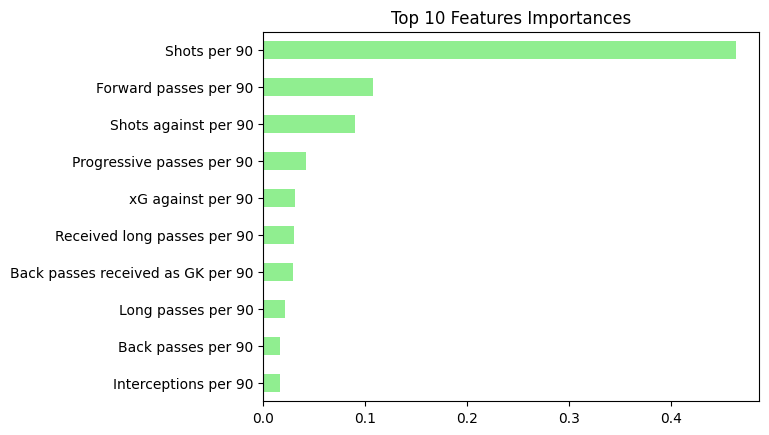

In [75]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Select the top 10 values
importances_top10 = importances_sorted[-10:]

# Draw a horizontal barplot of the top 10 importances
importances_top10.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Features Importances')
plt.show()

#### Linear regression

#### I have used the Linear Regression model for predicting the Market value of the players

In [76]:
independent_variables = []
for i in nacdata.columns:
    if i[-1] == "0":
        independent_variables.append(i)
#print(independent_variables)

X = nacdata[independent_variables]
y = nacdata["Market value"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
football_model = LinearRegression()

# Train the model
football_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_football = football_model.predict(X_test)

# Evaluate the Multiple Linear Regression Model
football_mse = mean_squared_error(y_test, y_pred_football)
football_r2 = r2_score(y_test, y_pred_football)

print(football_mse)
print(football_r2)

1658923352259.4236
0.05880499257202765


#### Logistic regression

##### I have used the Logistic Regression model to predict the Disposition of the players

In [77]:
X = nacdata[independent_variables]
y = nacdata["Disposition"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
football_model = LogisticRegression()

# Train the model
football_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_football = football_model.predict(X_test)

# Evaluate the Logistic Regression Model
accuracy = accuracy_score(y_test, y_pred_football)
confusion_mat = confusion_matrix(y_test, y_pred_football)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8872089507106139
Confusion Matrix:
 [[1151   16    0   35]
 [  24  764    0   94]
 [   1   10  239    0]
 [  22  171    0  780]]


d:\Anaconda\envs\block_b\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Tree-based model

##### Train a regression tree

In [78]:
nacdata["Disposition in numbers"] = nacdata["Disposition"].replace({"Forward": 0, "Midfielder": 1, "Defender": 2, "Goalkeeper": 3})

X = nacdata[independent_variables]
y = nacdata["Disposition in numbers"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) 

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=4,
             min_samples_leaf=0.01,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.01, random_state=3)

##### Evaluate the regression tree

In [79]:
# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.45


#### Gradient Boosting Trees and SVM

##### First set the categorical values to numerical values

In [80]:
nacdata["Disposition in numbers"] = nacdata["Disposition"].replace({"Forward": 0, "Midfielder": 1, "Defender": 2, "Goalkeeper": 3})

X = nacdata[independent_variables]
y = nacdata["Disposition in numbers"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### Then do the Gradient Boosting

In [81]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = MSE(y_test, y_pred) **(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.373


#### Support Vector Machines

In [82]:
# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
classifier = SVC(kernel='rbf') 

# Train the SVM classifier
classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_scaled)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = MSE(y_test, y_pred) ** 0.5

# Print RMSE
print('Test set RMSE of SVM: {:.3f}'.format(rmse_test))

Test set RMSE of SVM: 0.395


#### Unsupervised learning with K-Means

##### I used K-Means clustering to show the correleation between players' Market value and Age

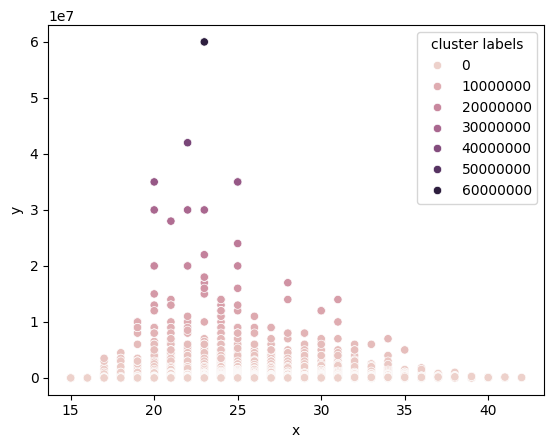

In [83]:
x = nacdata["Age"].astype(float)
y = nacdata["Market value"].astype(float)

# Assuming x and y are your data arrays
data_tuples = list(zip(x, y))
df = pd.DataFrame(data_tuples, columns=['x', 'y'])

# Convert columns to numeric if needed
df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])

# Remove rows with missing values
df = df.dropna()

# Compute cluster centers
centroids, _ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue=nacdata["Market value"], data=df)
plt.legend(title='cluster labels')
plt.show()

#### Correlation Analysis and Feature Selection


#### I will use Lasso Regression for  Correlation Analyses and Feature Selection

d:\Anaconda\envs\block_b\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+16, tolerance: 3.245e+12
  model = cd_fast.enet_coordinate_descent(


55


d:\Anaconda\envs\block_b\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+16, tolerance: 3.245e+12
  model = cd_fast.enet_coordinate_descent(


[  21727.6544183    63525.01000101  -91788.09616113  -30080.91287848
  -59604.29062285 -201792.04341167  -11522.01447296  -44164.54454247
  -54400.33350385 -368075.08863926   58503.04548202 1139286.49082504
 -778095.55578069  971535.24730104  -93172.45618435 -102825.57397315
  213636.91610623 -308338.13475723  313102.29157885  291640.53906395
  -38670.61620329  -27787.09910238  -33619.97740182   65415.42677269
   68032.60466568   41318.86793554  -87550.58442986  -43474.22192454
  -12492.88617572  -31948.55048876  -60258.69755835  -34251.65931236
   29752.35443784   13546.49902153  793872.63639236 -138296.88636124
  271414.31119696  467699.57382646   55039.96017338  257878.96989101
   30902.94650409  -60084.36424629   17078.32279606  277057.01675939
  151365.16944514  -36334.17585882   47041.37158989  120943.58026152
 -322303.88630954  306563.04948494   53584.93539562  141061.33594847
 -202155.85519844  126064.13345786  117847.42551965]


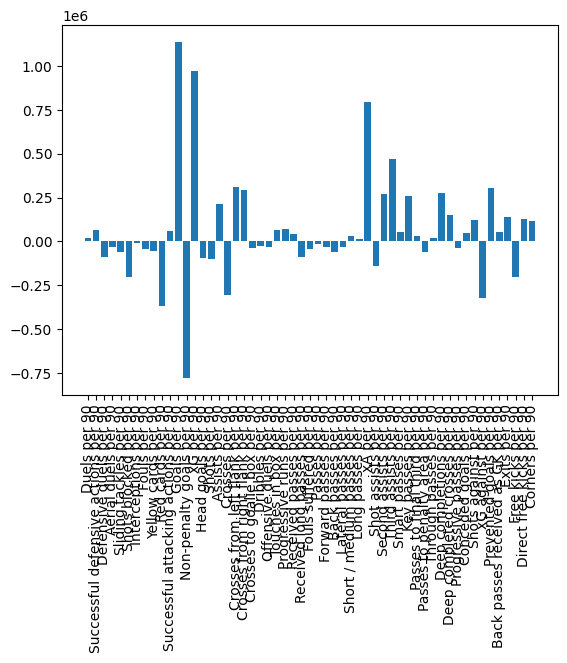

In [84]:
# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

print(len(independent_variables))

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(independent_variables, lasso_coef)
plt.xticks(rotation=90)
plt.show()

#### Lets remove from our model the variables with 0 correlation with the target value

d:\Anaconda\envs\block_b\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+16, tolerance: 3.245e+12
  model = cd_fast.enet_coordinate_descent(


55


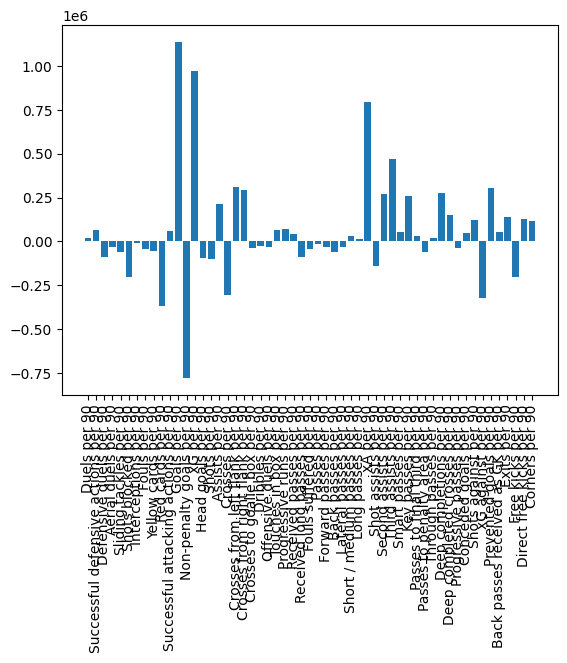

In [85]:
# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_

# Filter coefficients based on correlation threshold
selected_indices = np.where((lasso_coef != 0 ))
selected_variables = [independent_variables[i] for i in selected_indices[0]]
selected_coef = lasso_coef[selected_indices]

print(len(selected_variables))

# Plot the selected coefficients
plt.bar(selected_variables, selected_coef)
plt.xticks(rotation=90)
plt.show()

✍️ I chose the features above because they showed correlation with the target variable. There were no values with 0 correlation, so I could not remove any of the values from my model. This means that this is the best prediction I can make, because all of the 55 features are important and have an influence on my prediction.

### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s). This is related to the sufficient criteria of ILO 5.0. 

#### Create KNN (K Nearest Neighbour Classifier)

In [86]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8584820078621107

In [87]:
knn.predict([X.iloc[0]])

d:\Anaconda\envs\block_b\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

#### Plot Confusion Matrix

In [88]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 751,  124,   13,    1],
       [ 174,  743,   42,    0],
       [  21,   91, 1100,    0],
       [   0,    2,    0,  245]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

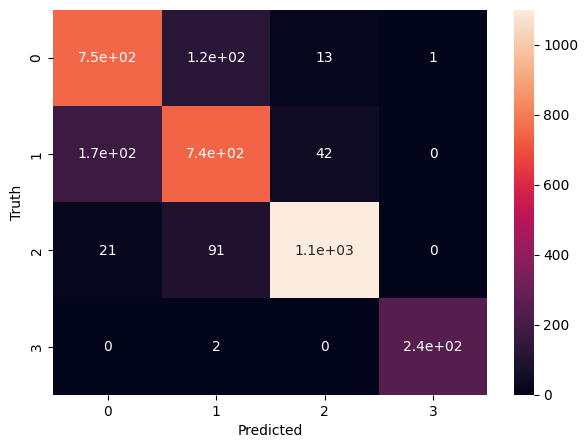

In [89]:
%matplotlib inline

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Print classification report for precesion, recall and f1-score for each classes

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       889
           1       0.77      0.77      0.77       959
           2       0.95      0.91      0.93      1212
           3       1.00      0.99      0.99       247

    accuracy                           0.86      3307
   macro avg       0.88      0.88      0.88      3307
weighted avg       0.86      0.86      0.86      3307



✍️ Interpretation of the model evaluation: The model does quite well because it has an 86% overall accuracy. We can see from the classification report that the goalkeepers are predicted fully right, and defenders are predicted with a high accuracy. It is difficult to distinguish forwarders and midfielders, because of their similarities in the different measures. But it shows us that these 2 positions have the most potential to improve and work with.

### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). This is related to the good criteria of ILO 5.0.  

#### Adding 4 more features to my selected variables

In [91]:
selected_variables.append("Goals")
selected_variables.append("xG")
selected_variables.append("Assists")
selected_variables.append("xA")

print(selected_variables)

['Duels per 90', 'Successful defensive actions per 90', 'Defensive duels per 90', 'Aerial duels per 90', 'Sliding tackles per 90', 'Shots blocked per 90', 'Interceptions per 90', 'Fouls per 90', 'Yellow cards per 90', 'Red cards per 90', 'Successful attacking actions per 90', 'Goals per 90', 'Non-penalty goals per 90', 'xG per 90', 'Head goals per 90', 'Shots per 90', 'Assists per 90', 'Crosses per 90', 'Crosses from left flank per 90', 'Crosses from right flank per 90', 'Crosses to goalie box per 90', 'Dribbles per 90', 'Offensive duels per 90', 'Touches in box per 90', 'Progressive runs per 90', 'Received passes per 90', 'Received long passes per 90', 'Fouls suffered per 90', 'Passes per 90', 'Forward passes per 90', 'Back passes per 90', 'Lateral passes per 90', 'Short / medium passes per 90', 'Long passes per 90', 'xA per 90', 'Shot assists per 90', 'Second assists per 90', 'Third assists per 90', 'Smart passes per 90', 'Key passes per 90', 'Passes to final third per 90', 'Passes t

In [92]:
X = nacdata[selected_variables]
y = nacdata["Disposition"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
football_model = LogisticRegression()

# Train the model
football_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_football = football_model.predict(X_test)

# Evaluate the Logistic Regression Model
accuracy = accuracy_score(y_test, y_pred_football)
confusion_mat = confusion_matrix(y_test, y_pred_football)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8853946174780768
Confusion Matrix:
 [[1151   18    0   33]
 [  22  760    0  100]
 [   1    8  241    0]
 [  23  173    1  776]]


d:\Anaconda\envs\block_b\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✍️ I improved my model by adding 4 more features (Goals, xG, Assists, xA) to my selected variables.

### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. This is related to the excellent criteria of ILO 5.0.  

In [93]:
# Define the parameter grid
max_features_range = np.arange(1, 6, 1)
n_estimators_range = np.arange(10, 72, 10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 4, 'n_estimators': 70} with a score of 0.88


In [94]:
# Initialize the Random Forest classifier with the specified parameters
rf_classifier = grid.best_estimator_

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Print accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.3f}")

Accuracy on the test set: 0.884


✍️ The model is chose is the best because I could use the best parameters with the RandomForestClassifier, and it gave me an 88% accuracy, which is really decent.

### Linear Algebra and Calculus

In the following subsection, provide the related evidences for ILO7.0.

### Assignment for "Elementary Operation on Matrices"

This task is associated with the 'Poor' criterion of ILO 7.0. You can find the assignment [here](https://adsai.buas.nl/Study%20Content/Advanced%20Python/AssignElemOpe.html).   

Please provide the related link to the PDF file for Task 1 of assignment on elementary operations on matrices. 

https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-MarkMolnar232926/blob/main/Block_B/Deliverables/ILO7/EleOpeMat_232926.pdf

Please provide your code for Task 2 of assignment on elementary operations on matrices.

### 1. Use Python and Numpy to check your answers to Task 1

#### To compute the transpose of a matrix you can use either numpy.transpose function or .T method

In [95]:
a = np.array([[3, -5], [-2, 7]])
b = np.array([[2, -3, 4], [-5, 6, 7], [-8, 9, 1]])
print(np.transpose(a))
print(np.transpose(b))

[[ 3 -2]
 [-5  7]]
[[ 2 -5 -8]
 [-3  6  9]
 [ 4  7  1]]


#### To compute element-wise product, you can use either numpy.multiply function or * operator.

In [96]:
a = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
b = np.array([[2, -3, -4], [-5, -6, 7], [-8, 9, 1]])
print(a*b)


[[  6  -6   4]
 [ 10 -42  28]
 [ -8  54   8]]


#### To compute matrix product, you can use .dot method, or @ operator, or numpy.matmul function.

In [97]:
e = a@b
print(e)

[[  4 -30   1]
 [-71   0  61]
 [-92  33  46]]


#### To compute matrix inversion, you can use numpy.linalg.inv function.

In [98]:
c = np.array([[3, 2], [-2, 7]])
d = np.array([[4, 0], [0, 5]])
print(np.linalg.inv(c@d))

[[ 0.07  -0.02 ]
 [ 0.016  0.024]]


### 2. Consider the following matrices and scalars:

In [99]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8, 9]])
C = np.array([[-5, 4, 9], [6, 1, 3], [7, 2, -8]])
alpha = 2
beta = 3

def verify(a, b):
    return np.array_equal(a, b)

print(verify(np.transpose(np.transpose(A)), A))
print(verify(A + B, B + A))
print(verify(A + (B + C), (A + B) + C))
print(verify(np.transpose(A + B), np.transpose(A) + np.transpose(B)))
print(verify(A*B, B*A))
print(verify(A * (B*C), (A*B) * C))
print(verify(A * (B + C), A*B + A*C))
print(verify(np.transpose(A * B), np.transpose(B)*np.transpose(A)))
print(verify(np.linalg.inv(A*B), np.linalg.inv(B) * np.linalg.inv(A)))
print(verify(np.linalg.inv(np.transpose(A)), np.transpose(np.linalg.inv(A))))
print(verify((alpha + beta)*A, alpha*A + beta*A))
print(verify(alpha*(A + B), alpha*A + alpha*B))
print(verify(np.linalg.inv(alpha*A), (-alpha)*np.linalg.inv(A)))

True
True
True
True
True
True
True
True
False
False
True
True
False


### Assignment for  "Linear Regression Model Using Normal Equations"

This task is associated with the ‘Poor' criterion of ILO 7.0. You need to complete the assignment on linear regression using normal equations at the middle of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/6.AdvancedNumPyMatPlotlib.html).  

## Task 1

#### 1.

In [100]:
import numpy as np
A = np.array([[1, 3, 1], [1, 1, 0], [1, -1, 1]])
B = np.array([[9], [10], [8]])

X = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(B)

print(X)

[[ 9.75]
 [ 0.25]
 [-1.5 ]]


#### 2.

In [101]:
C = np.array([[5, 6, -7, 1], [1, 2, 3, 4], [1, 0, 1, 0], [1, -3, 0, 0]])
D = np.array([[8], [7], [9], [12]])

Y = np.linalg.inv(C.T.dot(C)).dot(C.T).dot(D)

print(Y)

[[ 6.8372093 ]
 [-1.72093023]
 [ 2.1627907 ]
 [-0.72093023]]


## Task 2

In [102]:
np.random.seed(1358)

n_sample = 10
x = np.linspace(1, 5, n_sample)
e = 0.1 * np.random.randn(n_sample)

y = 2 * x + 3 + e

a = np.ones((n_sample, 1))
b = np.expand_dims(x, axis=1)
X = np.concatenate((b, a), axis=1)

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[1.98467703 3.06827132]


## Task 3

In [103]:
np.random.seed(1358)

n_sample = 30
x = np.linspace(1, 10, n_sample)
e = 0.2 * np.random.randn(n_sample)

y = 3 + 2 * x + 7 * x**2 + e

X = np.column_stack((np.ones(n_sample), x, x**2))

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[3.08069949 1.99527895 6.9987292 ]


### Assignment for "Calculus for Machine Learning"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete with the [Differential Calculus](https://www.khanacademy.org/math/differential-calculus) course in Khan Academy and provide a link to the PDF file of certificate of completion you have put in your personal GitHub repository.

https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-MarkMolnar232926/blob/main/Block_B/Deliverables/ILO7/CalMacLea_232926.pdf 

### Assignment for "DataLab: Python for Symbolic Mathematics"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete all the DataLab tasks (Tasks 1-5) at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/28.SymbolicMathematicsDataLab.html). Provide your codes in the following cell.

## Task 1

### Symbolic Computation with SymPy

In [104]:
# Define symbolic variable
x, y = symbols('x y')

# Definition of the expression
ex1 = 2 * x**2 -x * y + 3
ex1

2*x**2 - x*y + 3

In [105]:
expr = 2*x**2-x*y+3
ex2 = (x * expr + (2 * x + y)) / (x**2 + y)
ex2

(x*(2*x**2 - x*y + 3) + 2*x + y)/(x**2 + y)

In [106]:
expand(ex2)

2*x**3/(x**2 + y) - x**2*y/(x**2 + y) + 5*x/(x**2 + y) + y/(x**2 + y)

In [107]:
ex2.evalf(subs={x:-2, y:1})

-5.80000000000000

In [108]:
# Define the variable
equation = Eq(2*x + 5, 11)

# Solve the equation
solution = solve(equation, x)

# Print the solution
print("Solution:", solution)

Solution: [3]


In [109]:
# Define the variables
x, y = symbols('x y')

# Define the system of equations
equation1 = Eq(2*x + y, 5)
equation2 = Eq(x - 2*y, 15)

# Define the system of equations
system_of_equations = [equation1, equation2]

# Solve the system of equations
solution = solve(system_of_equations, (x, y))

# Display the solution
print("Solution:", solution)

Solution: {x: 5, y: -5}


### Limit Computation (Optional)

In [110]:
# Define the function
f = sin(x) / x

# calculate the limit as x approaches 2
lim_result = limit(f, x, 0)
lim_result

1

### Derivative Computation

In [111]:
# Define the variable 
x = symbols('x')

# Define the function
f = x**3 + 3 * x**2 + sin(x)

# Calculate the derivative
der_f = diff(f, x)

der_f

3*x**2 + 6*x + cos(x)

### Taylor Series (Optional)

In [112]:
# Define the variable and the function
x = symbols('x')
f = exp(x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 0, 4).removeO()

# Display the terms of the Taylor series
print(taylor_series)

x**3/6 + x**2/2 + x + 1


### Least Squares Problem

In [113]:
# Sample data points
data_points = [(1,2), (2,3), (3,4), (4,5)]

# Variables for the linear equation: y = mx + c
m, c = sp.symbols('m c')

# Sum of squared differences between observed and predicted y-values
error = sum((m * x + c - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_m = sp.diff(error, m)
partial_c = sp.diff(error, c)

# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_m, partial_c), (m, c))

best_fit_m, best_fit_c = solution[m], solution[c]

print(f"The best-fit line is: y = {best_fit_m}x + {best_fit_c}")

The best-fit line is: y = 1x + 1


## Task 2

Text(0, 0.5, 'y')

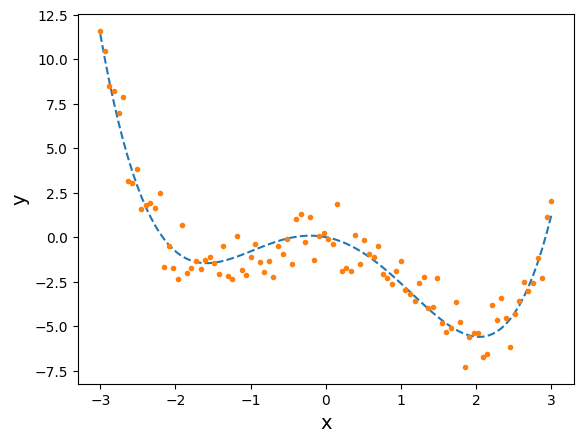

In [114]:
np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

### 1.

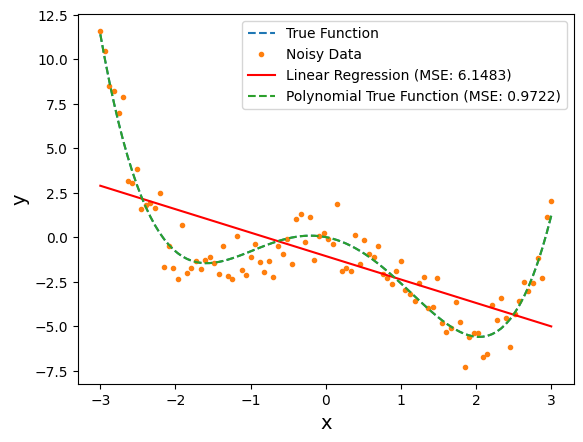

Mean Squared Error (Linear Regression): 6.1483
Mean Squared Error (Polynomial True Function): 0.9722


In [115]:
# Original code for generating data
np.random.seed(1358)
x = np.linspace(-3, 3, 100)
y_true = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
y = y_true + np.random.randn(len(x))

# Fit a linear model using the least squares method
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]

# Calculate mean squared errors
mse_linear = mean_squared_error(y, a * x + b)
mse_polynomial = mean_squared_error(y, y_true)

# Plot the true function, noisy data points, and the linear regression line
plt.plot(x, y_true, '--', label='True Function')
plt.plot(x, y, '.', label='Noisy Data')
plt.plot(x, a * x + b, 'r', label=f'Linear Regression (MSE: {mse_linear:.4f})')
plt.plot(x, y_true, '--', label=f'Polynomial True Function (MSE: {mse_polynomial:.4f})')

plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()

# Compare mean squared errors
print(f'Mean Squared Error (Linear Regression): {mse_linear:.4f}')
print(f'Mean Squared Error (Polynomial True Function): {mse_polynomial:.4f}')

### 2.

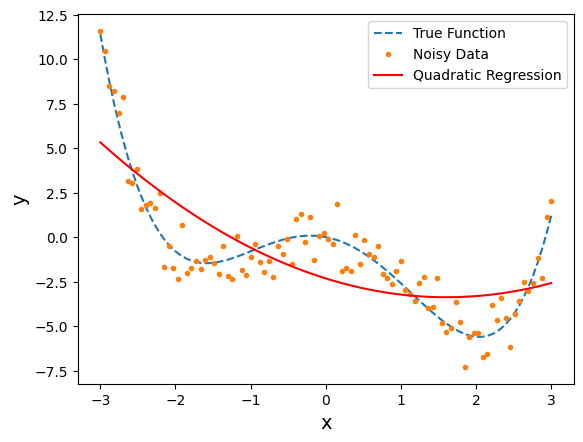

Parameter a: 0.41051348395317366
Parameter b: -1.3174589584450884
Parameter c: -2.321937641005322


In [116]:
# Original code for generating data
np.random.seed(1358)
x = np.linspace(-3, 3, 100)
y_true = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
y = y_true + np.random.randn(len(x))

# Fit a quadratic model using the least squares method
A = np.vstack([x**2, x, np.ones(len(x))]).T
a, b, c = np.linalg.lstsq(A, y, rcond=None)[0]

# Plot the true function, noisy data points, and the quadratic regression curve
plt.plot(x, y_true, '--', label='True Function')
plt.plot(x, y, '.', label='Noisy Data')
plt.plot(x, a * x**2 + b * x + c, 'r', label=f'Quadratic Regression')

plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()

# Display the obtained parameters
print(f'Parameter a: {a}')
print(f'Parameter b: {b}')
print(f'Parameter c: {c}')

### 3.

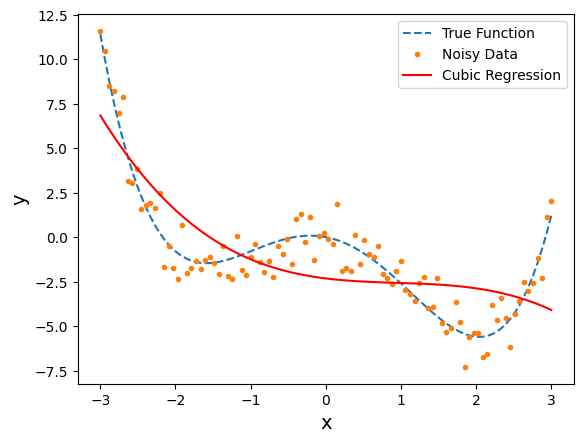

Parameter a: -0.14444096602709924
Parameter b: 0.4105134839531736
Parameter c: -0.5218266546708361
Parameter d: -2.3219376410053214


In [117]:
# Original code for generating data
np.random.seed(1358)
x = np.linspace(-3, 3, 100)
y_true = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
y = y_true + np.random.randn(len(x))

# Fit a cubic model using the least squares method
A = np.vstack([x**3, x**2, x, np.ones(len(x))]).T
a, b, c, d = np.linalg.lstsq(A, y, rcond=None)[0]

# Plot the true function, noisy data points, and the cubic regression curve
plt.plot(x, y_true, '--', label='True Function')
plt.plot(x, y, '.', label='Noisy Data')
plt.plot(x, a * x**3 + b * x**2 + c * x + d, 'r', label='Cubic Regression')

plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()

# Display the obtained parameters
print(f'Parameter a: {a}')
print(f'Parameter b: {b}')
print(f'Parameter c: {c}')
print(f'Parameter d: {d}')

### 4.

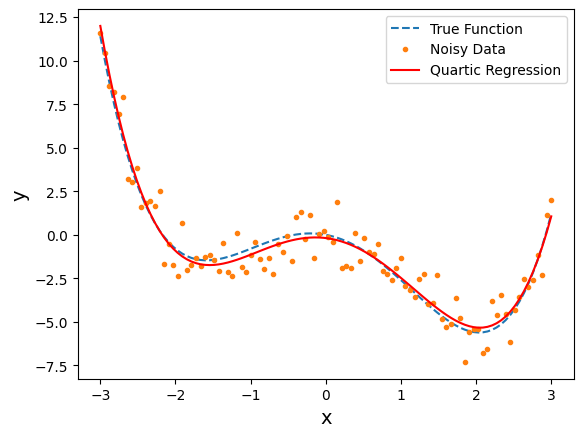

Parameter a: 0.295887429304485
Parameter b: -0.1444409660270991
Parameter c: -1.9173827098166263
Parameter d: -0.5218266546708388
Parameter e: -0.18550358194273395


In [118]:
# Original code for generating data
np.random.seed(1358)
x = np.linspace(-3, 3, 100)
y_true = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
y = y_true + np.random.randn(len(x))

# Fit a quartic model using the least squares method
A = np.vstack([x**4, x**3, x**2, x, np.ones(len(x))]).T
a, b, c, d, e = np.linalg.lstsq(A, y, rcond=None)[0]

# Plot the true function, noisy data points, and the quartic regression curve
plt.plot(x, y_true, '--', label='True Function')
plt.plot(x, y, '.', label='Noisy Data')
plt.plot(x, a * x**4 + b * x**3 + c * x**2 + d * x + e, 'r', label='Quartic Regression')

plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()

# Display the obtained parameters
print(f'Parameter a: {a}')
print(f'Parameter b: {b}')
print(f'Parameter c: {c}')
print(f'Parameter d: {d}')
print(f'Parameter e: {e}')

### 5.

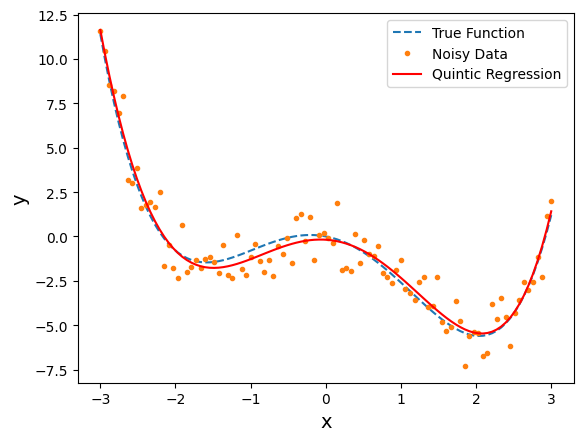

Parameter a: 0.012794777014116337
Parameter b: 0.2958874293044852
Parameter c: -0.27489521222857405
Parameter d: -1.9173827098166258
Parameter e: -0.26534201555355313
Parameter f: -0.18550358194273284


In [119]:
# Original code for generating data
np.random.seed(1358)
x = np.linspace(-3, 3, 100)
y_true = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
y = y_true + np.random.randn(len(x))

# Fit a quintic model using the least squares method
A = np.vstack([x**5, x**4, x**3, x**2, x, np.ones(len(x))]).T
a, b, c, d, e, f = np.linalg.lstsq(A, y, rcond=None)[0]

# Plot the true function, noisy data points, and the quintic regression curve
plt.plot(x, y_true, '--', label='True Function')
plt.plot(x, y, '.', label='Noisy Data')
plt.plot(x, a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f, 'r', label='Quintic Regression')

plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()

# Display the obtained parameters
print(f'Parameter a: {a}')
print(f'Parameter b: {b}')
print(f'Parameter c: {c}')
print(f'Parameter d: {d}')
print(f'Parameter e: {e}')
print(f'Parameter f: {f}')

### Which model fits best with data set x, y?
The fourth one fits the best.

### How do you compare the models?
I compared the models with the line of the true function. Which line is the closest to the true function line, that is the best fitted model.

## Task 3

### 1.

In [120]:
# Define the variable 
x = symbols('x')

# Define the function
f = x**2 + 2 * x + 1

# Calculate the derivative
der_f = diff(f, x)
der_f

2*x + 2

### 2.

In [121]:
# Define the variable 
x = symbols('x')

# Define the function
f = (3 * x - 5) ** 3

# Calculate the derivative
der_f = diff(f, x)
der_f

9*(3*x - 5)**2

### 3.

In [122]:
# Define the variable 
x = symbols('x')

# Define the function
f = (sqrt(x)-1)**2-(x**2+1)**4

# Calculate the derivative
der_f = diff(f, x)
der_f

-8*x*(x**2 + 1)**3 + (sqrt(x) - 1)/sqrt(x)

### 4.

In [123]:
# Define the variable 
x = symbols('x')

# Define the function
f = 7*cot(x)-8*sp.acos(x)

# Calculate the derivative
der_f = diff(f, x)
der_f

-7*cot(x)**2 - 7 + 8/sqrt(1 - x**2)

### 5.

In [124]:
# Define the variable 
x = symbols('x')

# Define the function
f = x - sp.ln(x) + 7

# Calculate the derivative
der_f = diff(f, x)
der_f

1 - 1/x

### 6.

In [125]:
# Define the variable 
x = symbols('x')

# Define the function
f = -10 * sp.E**x + 5**x - 5 * x + x/5

# Calculate the derivative
der_f = diff(f, x)
der_f

5**x*log(5) - 10*exp(x) - 24/5

### 7.

In [126]:
# Define the variable 
x = symbols('x')

# Define the function
f = (2 * sin(x)) / (sin(x) - cos(x))

# Calculate the derivative
der_f = diff(f, x)
der_f

2*(-sin(x) - cos(x))*sin(x)/(sin(x) - cos(x))**2 + 2*cos(x)/(sin(x) - cos(x))

### 8.

In [127]:
# Define the variable 
x = symbols('x')

# Define the function
f = (x ** 2 * sp.ln(x)) / (1 - sp.atan(x))

# Calculate the derivative
der_f = diff(f, x)
der_f

x**2*log(x)/((1 - atan(x))**2*(x**2 + 1)) + 2*x*log(x)/(1 - atan(x)) + x/(1 - atan(x))

## Task 4 (Optional)

### 1.

In [128]:
# Define the function
f = (x-2) / (x**2 + 2*x + 1)

# calculate the limit as x approaches 2
lim_result = limit(f, x, 2)
lim_result

0

### 2.

In [129]:
# Define the function
f = (x**3 + 3*x**2 + 5) / (x**2 - x - 6)

# calculate the limit as x approaches 2
lim_result = limit(f, x, -2)
lim_result

-oo

### 3.

In [130]:
cbrt = 1/3

# Define the function
f = ((sqrt(x**2+1) + x)**2) / (sp.cbrt(x**6 + 1))

# calculate the limit as x approaches 2
lim_result = limit(f, x, oo)
lim_result

4

### 4.

In [131]:
# Define the function
f = (sin(10*x)) / (10 * x)

# calculate the limit as x approaches 2
lim_result = limit(f, x, 0)
lim_result

1

### 5.

In [132]:
# Define the function
f = x / (sqrt(1 - cos(x)))

# calculate the limit as x approaches 2
lim_result = limit(f, x, 0)
lim_result

sqrt(2)

## Task 5 (Optional)

### 1.

In [133]:
# Define the variable and the function
x = symbols('x')
f = sin(x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 0, 5).removeO()

# Display the terms of the Taylor series
print(taylor_series)

-x**3/6 + x


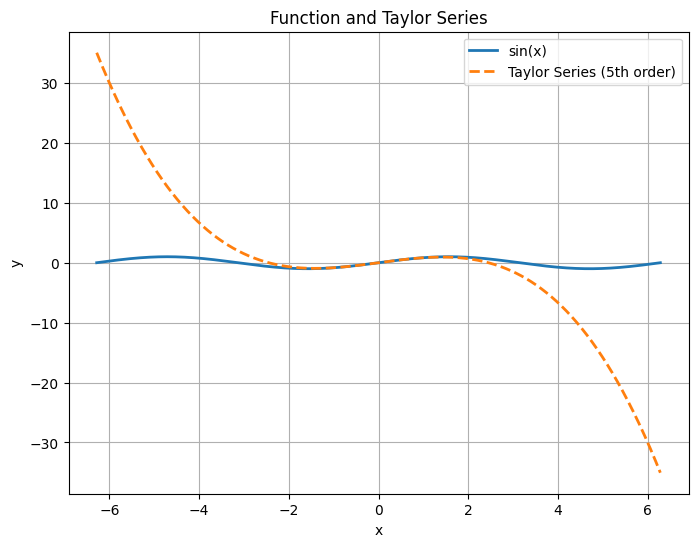

In [134]:
# Define the variable and the function
x_sym = symbols('x')
f = sin(x_sym)

# Compute the terms of the Taylor series
taylor_series = f.series(x_sym, 0, 5).removeO()

# Convert the symbolic expressions to Python functions
f_func = lambda x_val: f.subs(x_sym, x_val)
taylor_func = lambda x_val: taylor_series.subs(x_sym, x_val)

# Create an array of x values
x_values = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Evaluate the function and its Taylor series at each x value
f_values = [f_func(x_val) for x_val in x_values]
taylor_values = [taylor_func(x_val) for x_val in x_values]

# Plot the function and its Taylor series
plt.figure(figsize=(8, 6))
plt.plot(x_values, f_values, label='sin(x)', linewidth=2)
plt.plot(x_values, taylor_values, label='Taylor Series (5th order)', linestyle='--', linewidth=2)
plt.title('Function and Taylor Series')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### 2.

In [135]:
# Define the variable and the function
x = symbols('x')
f = sp.E**(3*x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 0, 5).removeO()

# Display the terms of the Taylor series
print(taylor_series)

27*x**4/8 + 9*x**3/2 + 9*x**2/2 + 3*x + 1


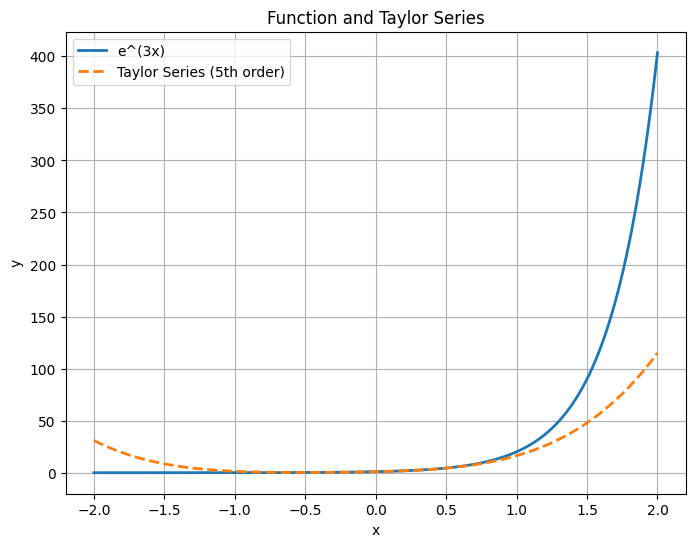

In [136]:
# Define the variable and the function
x_sym = symbols('x')
f = exp(3*x_sym)

# Compute the terms of the Taylor series
taylor_series = f.series(x_sym, 0, 5).removeO()

# Convert the symbolic expressions to Python functions
f_func = lambda x_val: f.subs(x_sym, x_val)
taylor_func = lambda x_val: taylor_series.subs(x_sym, x_val)

# Create an array of x values
x_values = np.linspace(-2, 2, 1000)

# Evaluate the function and its Taylor series at each x value
f_values = [f_func(x_val) for x_val in x_values]
taylor_values = [taylor_func(x_val) for x_val in x_values]

# Plot the function and its Taylor series
plt.figure(figsize=(8, 6))
plt.plot(x_values, f_values, label='e^(3x)', linewidth=2)
plt.plot(x_values, taylor_values, label='Taylor Series (5th order)', linestyle='--', linewidth=2)
plt.title('Function and Taylor Series')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### 3.

In [137]:
# Define the variable and the function
x = symbols('x')
f = sp.ln(x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 1, 5).removeO()

# Display the terms of the Taylor series
print(taylor_series)

x - (x - 1)**4/4 + (x - 1)**3/3 - (x - 1)**2/2 - 1


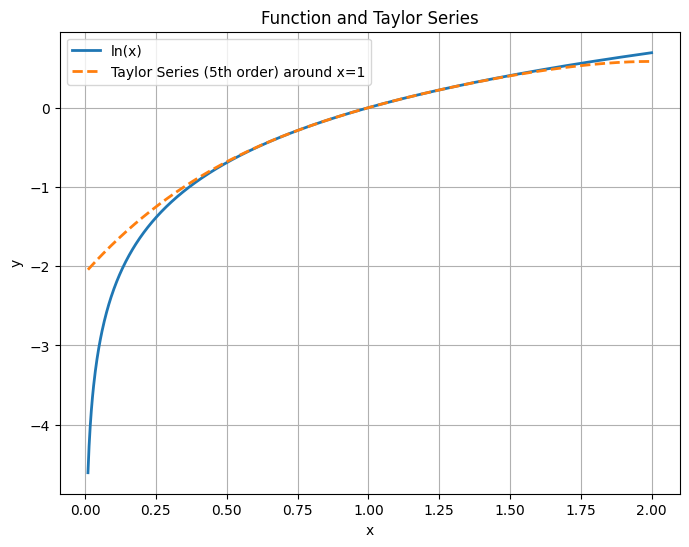

In [138]:
# Define the variable and the function
x_sym = symbols('x')
f = ln(x_sym)

# Compute the terms of the Taylor series
taylor_series = f.series(x_sym, 1, 5).removeO()

# Convert the symbolic expressions to Python functions
f_func = lambda x_val: f.subs(x_sym, x_val)
taylor_func = lambda x_val: taylor_series.subs(x_sym, x_val)

# Create an array of x values (excluding zero for ln(x))
x_values = np.linspace(0.01, 2, 1000)

# Evaluate the function and its Taylor series at each x value
f_values = [f_func(x_val) for x_val in x_values]
taylor_values = [taylor_func(x_val) for x_val in x_values]

# Plot the function and its Taylor series
plt.figure(figsize=(8, 6))
plt.plot(x_values, f_values, label='ln(x)', linewidth=2)
plt.plot(x_values, taylor_values, label='Taylor Series (5th order) around x=1', linestyle='--', linewidth=2)
plt.title('Function and Taylor Series')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### 4.

In [139]:
# Define the variable and the function
x = symbols('x')
f = tan(x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, math.pi/4, 5).removeO()

# Display the terms of the Taylor series
print(taylor_series)

0


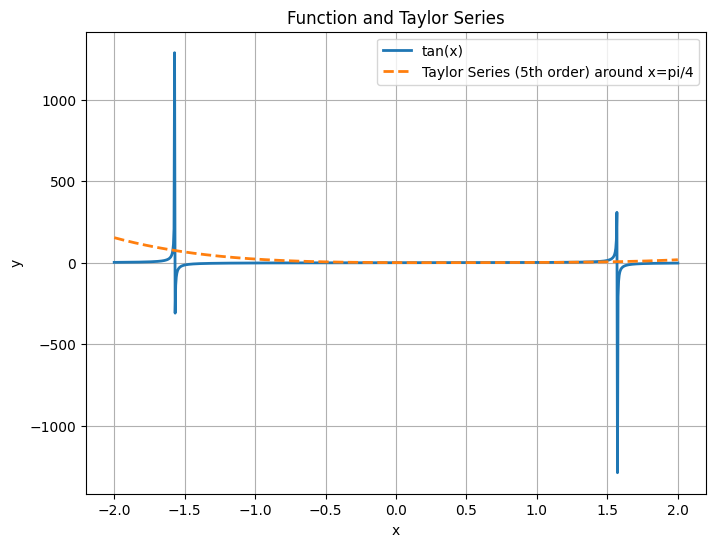

In [140]:
# Define the variable and the function
x_sym = symbols('x')
f = tan(x_sym)

# Compute the terms of the Taylor series
taylor_series = f.series(x_sym, pi/4, 5).removeO()

# Convert the symbolic expressions to Python functions
f_func = lambda x_val: f.subs(x_sym, x_val)
taylor_func = lambda x_val: taylor_series.subs(x_sym, x_val)

# Create an array of x values
x_values = np.linspace(-2, 2, 1000)

# Evaluate the function and its Taylor series at each x value
f_values = [f_func(x_val) for x_val in x_values]
taylor_values = [taylor_func(x_val) for x_val in x_values]

# Plot the function and its Taylor series
plt.figure(figsize=(8, 6))
plt.plot(x_values, f_values, label='tan(x)', linewidth=2)
plt.plot(x_values, taylor_values, label='Taylor Series (5th order) around x=pi/4', linestyle='--', linewidth=2)
plt.title('Function and Taylor Series')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Assignment for "Multivariable Calculus"

This task is associated with the "Insufficient" criterion in ILO 7.0. You need to complete the assignments 1-4 at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/27.MultivariableCalculus.html)

Provide a link to a PDF file, for assignments 1-3 in the following cell. 

https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-MarkMolnar232926/blob/main/Block_B/Deliverables/ILO7/MulCalAss_232926.pdf

Put your code  for assignment 4 in the following cell.

In [141]:
import sympy as sp

# Define the variables and the function
x, y = sp.symbols('x y')
f = sp.sin(x + y) + y * sp.cos(x)

# Define the point and the direction vector
point = (sp.pi/3, sp.pi/6)
direction = (3/5, 4/5)

# Calculate the partial derivatives
fx = sp.diff(f, x)
fy = sp.diff(f, y)

# Evaluate the partial derivatives at the given point
fx_val = fx.subs({x: point[0], y: point[1]})
fy_val = fy.subs({x: point[0], y: point[1]})

# Calculate the true directional derivative
true_directional_derivative = fx_val * direction[0] + fy_val * direction[1]

# Display header for the output
print(f"{'h':<8}{'Perturbed Derivative':<25}{'Difference from True':<25}")

# Use a for loop to approach zero
for i in range(1, 6):
    h = 0.1**i  # Decreasing h towards zero
    perturbed_point = (point[0] + h * direction[0], point[1] + h * direction[1])

    # Calculate the perturbed directional derivative
    perturbed_derivative = f.subs({x: perturbed_point[0], y: perturbed_point[1]}).evalf() - f.subs({x: point[0], y: point[1]}).evalf()

    # Calculate the difference from the true directional derivative
    difference = abs(perturbed_derivative - true_directional_derivative.evalf())

    # Print the results
    print(f"{h:<8}{perturbed_derivative:<25}{difference:<25}")

# Display the true directional derivative
print("\nTrue Directional Derivative =", true_directional_derivative.evalf())

h       Perturbed Derivative     Difference from True     
0.1     -0.00167217717453694     0.129602272539404        
0.0100000000000000020.00113496553387593      0.126795129830991        
0.00100000000000000020.000126487223792049     0.127803608141075        
0.000100000000000000020.0000127785813199832    0.127917316783547        
1.0000000000000003e-050.00000127915667191836   0.127928816208195        

True Directional Derivative = 0.127930095364867


### Assignments for "Optimization Algorithms"

This task is associated with the "Sufficient" criterion in ILO 7.0. 

Complete the assignments at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/29.OptimizationAlgorithms.html). Then put your code in the following cell.

### Optimization and Linear Regression using Gradient Descent

This is a template for **Assignment 1** of **Optimization and Linear Regression using Gradient Descent** (Monday of Week 8). 

Fill in the **None** part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal is to find the minimum of the following function:

$$f(x) =  0.3x^4 - 0.1x^3 - 2x^2 - 0.8x$$

using the Gradient Descent algorithm.

### Initilization

Consider an initial value for $𝑥$. You can initiate the Gradient Descent algorithm from any arbitrary starting point.

In [142]:
# Put your code here (1 line of code)
# Consider an initial value for x
x = 1

###  Define function
Define the following function

$$f(x) =  0.3x^4 - 0.1x^3 - 2x^2 - 0.8x$$

You are tasked with finding the minimum for this function.

In [143]:
def my_fun(x):
    # x (a scalar value): input value to your function
    
    # Output
    # y (scalar value): output of the function
    
    # Put your code here (1 line of code)
    y = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
    
    return y

**Test your my_fun**:

To ensure that you have implemented *my_fun(.)* correctly, run the following cell and compare the output with the expected value.

In [144]:
my_fun(-2)

-0.8000000000000003

The expected output is: -0.800

#### Compute the gradient of the function

To implement the Gradient Descent algorithm, you need to compute the derivative of the related function. 

Now, compute the derivative of the mathematical function

$$ f(x) = 0.3x^4 -0.1x^3 -2x^2 -0.8x$$

and implement the following function for computing the derivative of this function:

In [145]:
def grad_fun(x):
    # x (a scalar value): input to the derivative function
    # y (output of the derivative function)
    
    # Put your code here (1 line of code)
    y = 1.2 * x**3 - 0.3 * x**2 - 4 * x - 0.8
    
    return y

**Test grad_fun**:

Now, to ensure that you have computed and implemented the derivative function correctly, run the following cell and compare the result with the provided expected value.

In [146]:
grad_fun(0.5)

-2.725

The expected output is: -2.725

#### Implement Gradient Descent Update Rule

In this section, you need to implement the gradient descent update rule as follows:

$$x_{n+1} = x_n - \gamma \nabla f(x_n)$$

To execute this step, utilize the **grad_fun** that you have already implemented.

In [147]:
def grad_descent_step(x, alf):
    # x (a scalar value): the current value of x
    # alf (a scalar value): learning rate
    # x_new: the new value for x
    
    # Put your code here (1 line of code)
    x_new = x - alf * grad_fun(x)
    
    return x_new

**Test grad_descent_step function**:

Now, test your implemented Gradient Descent update rule by running the following cell and comparing the result with the expected value.

In [148]:
grad_descent_step(2.5, 0.1)

1.8925

The expected ouptput is: 1.8925

#### Implement Gradient Descent Algorithm

Now, you can implement the Gradient Descent algorithm using the previously developed functions, enabling you to complete the assignment by finding the optimal value of x and minimizing the function.

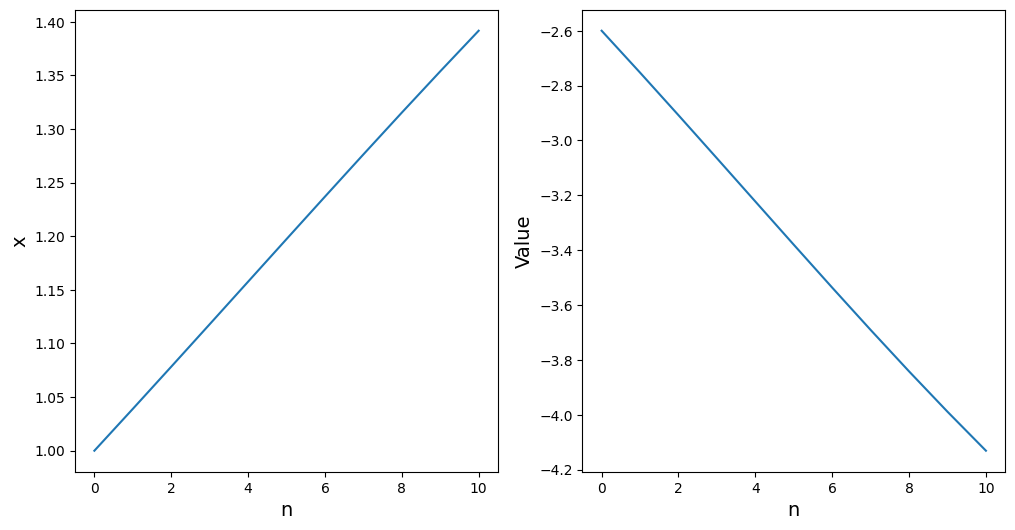

In [149]:
# Put your code here (1 line of code)
# Choose an initial value for x
x_init = 1

# Put your code here (1 line of code)
# Choose the learning rate
gam = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 10

# Save the values for x and function value
X = [x_init]

# Save the function value at x_init
FUN_VAL = [my_fun(x_init)]

for n in range(N):
    
    # Put your code here (1 line of code)
    # call the grad_descent_step
    x_new = grad_descent_step(X[-1], gam)
    
    # Put your code here (2 lines of code)
    # save the obtained value x_new in the list X (use append method)
    # save the function value at point x_new (use append method)
    X.append(x_new)
    FUN_VAL.append(my_fun(x_new))

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(range(N+1), X)
ax[0].set_xlabel('n', size=14)
ax[0].set_ylabel('x', size=14)

ax[1].plot(range(N+1), FUN_VAL)
ax[1].set_xlabel('n', size=14)
ax[1].set_ylabel('Value', size=14)

plt.show()

**The optimal value for x**:

In [150]:
# Put your code here (1 line of code)
# Define the optimal value for x
x_opt = X[-1]

print("The optimal value of x is:", x_opt)

The optimal value of x is: 1.3916415411372902


**The minimum value of the function**:

In [151]:
# Put your code here (1 line of code)
# Define the minimum value of the function at optimal point x_opt
min_val = my_fun(x_opt)

print("The minimum value of f is:", min_val)

The minimum value of f is: -4.130957334864837


#### Check the Result

Eventually, to ensure that you have implemented the Gradient Descent algorithm correctly, you can obtain the minimum value of the function using Python's capabilities.

You can check the Gradient Descent algorithm output by comparing the results obtained by the 'fmin' function from SciPy as follows:

In [152]:
minimum = fmin(my_fun, 3)

Optimization terminated successfully.
         Current function value: -5.608514
         Iterations: 16
         Function evaluations: 32


In [153]:
print("The optimal value for x is:", minimum[0])

The optimal value for x is: 2.0421386718749974


### Evaluate the impact of the learning rate on the convergence rate of the Gradient Descent algorithm towards the optimal solution.

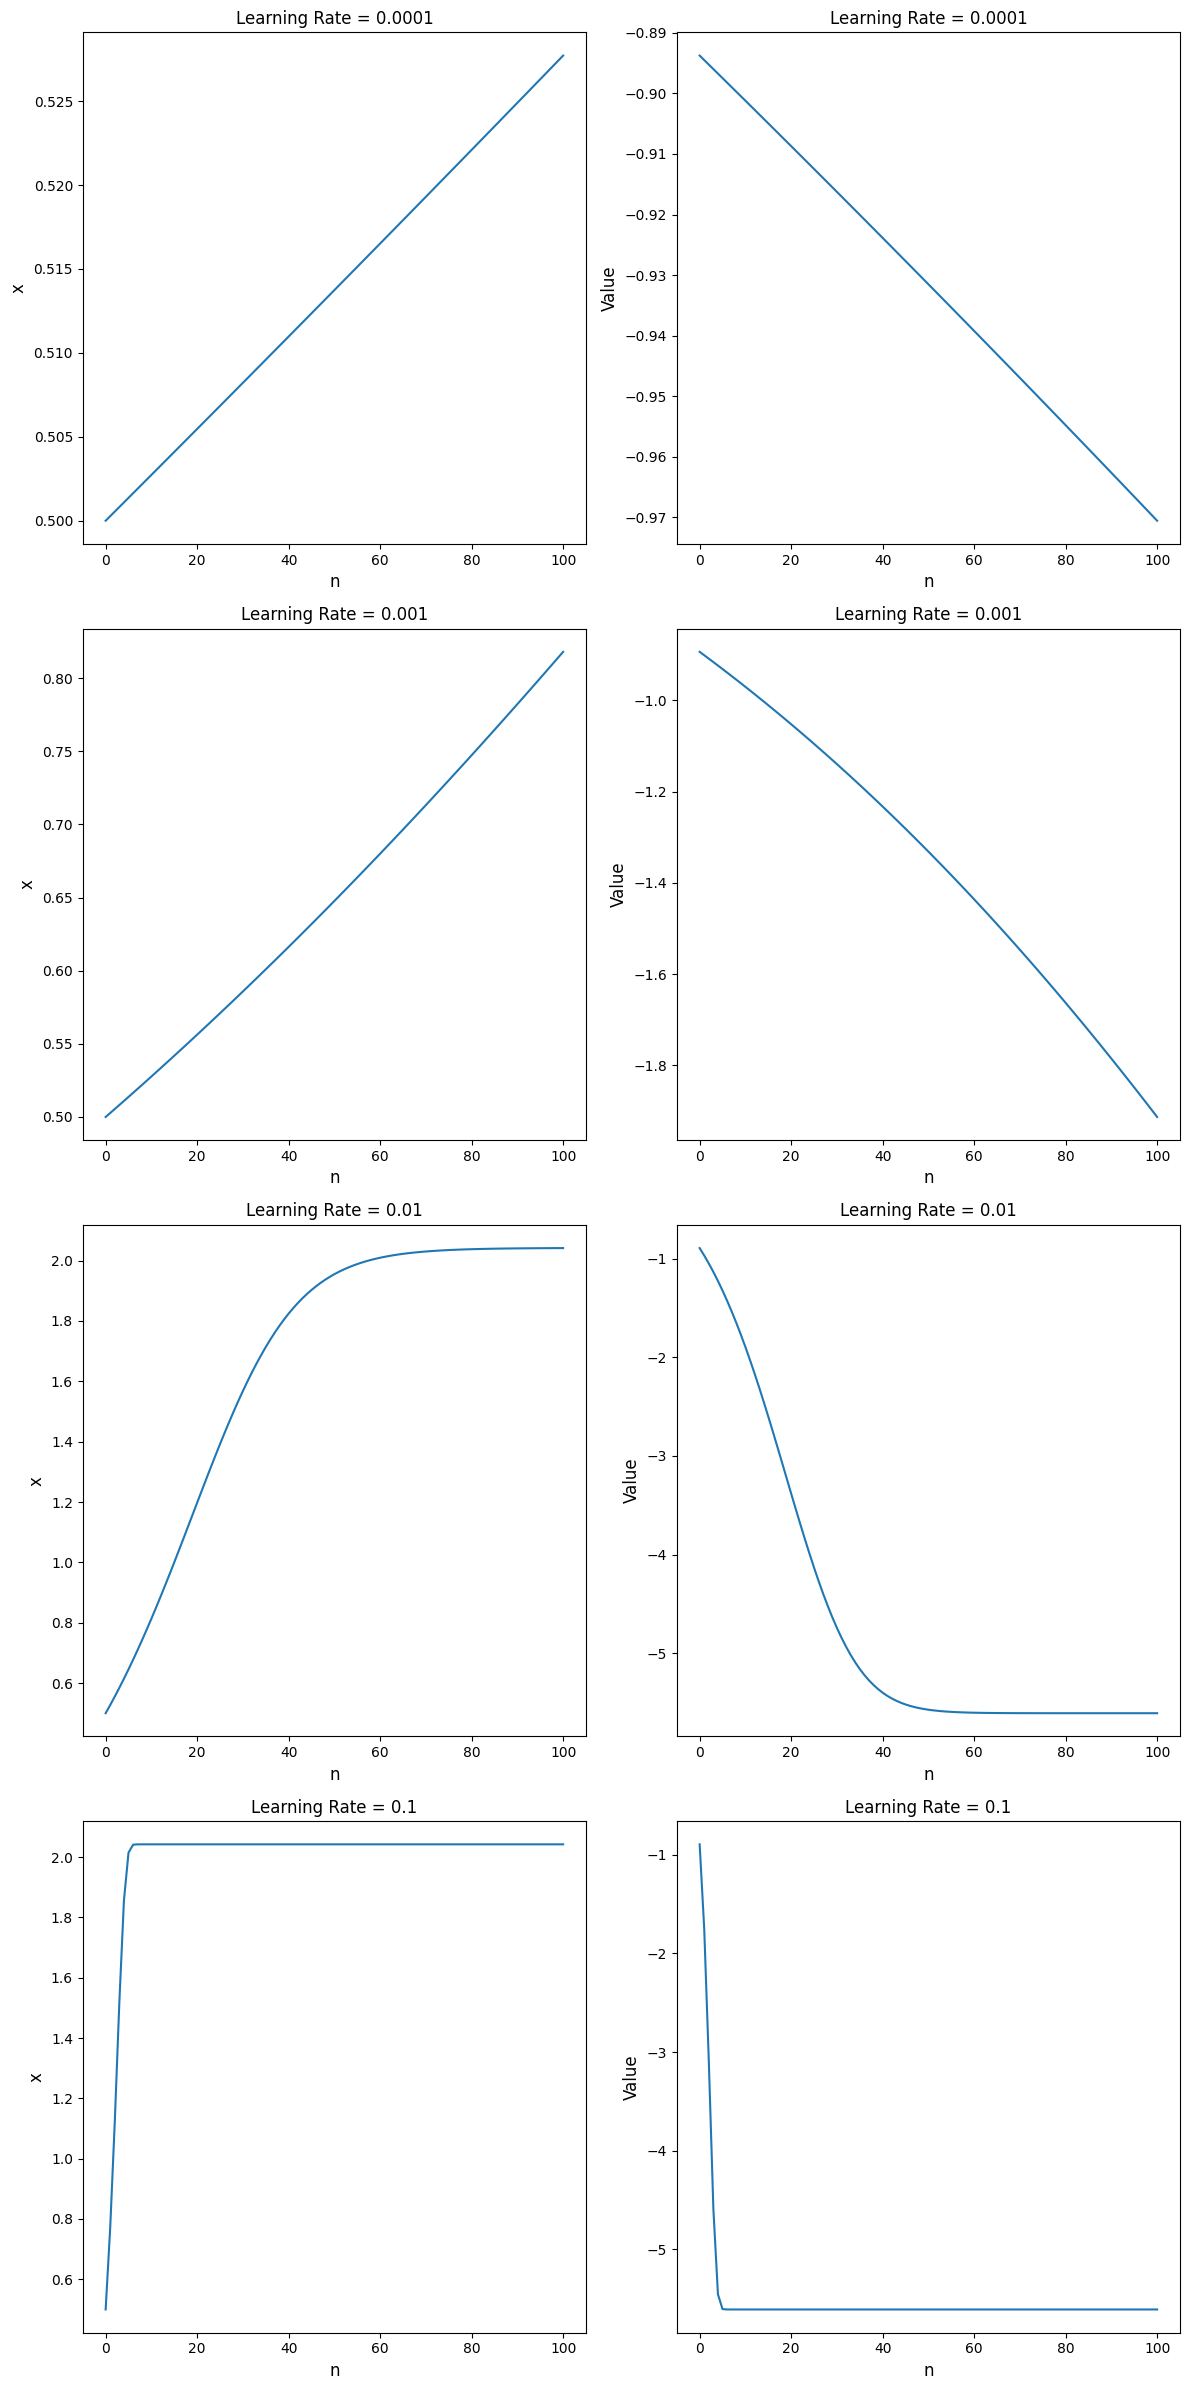

In [154]:
def my_fun(x):
    return 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x

def grad_fun(x):
    return 1.2 * x**3 - 0.3 * x**2 - 4 * x - 0.8

def grad_descent_step(x, alpha):
    return x - alpha * grad_fun(x)

def gradient_descent(x_init, alpha, num_iterations):
    X = [x_init]
    FUN_VAL = [my_fun(x_init)]
    
    for n in range(num_iterations):
        x_new = grad_descent_step(X[-1], alpha)
        X.append(x_new)
        FUN_VAL.append(my_fun(x_new))
    
    return X, FUN_VAL

learning_rates = [0.0001, 0.001, 0.01, 0.1]
num_iterations = 100

fig, ax = plt.subplots(len(learning_rates), 2, figsize=(12, 6 * len(learning_rates)))

for i, alpha in enumerate(learning_rates):
    X, FUN_VAL = gradient_descent(x_init=0.5, alpha=alpha, num_iterations=num_iterations)
    
    ax[i, 0].plot(range(num_iterations + 1), X)
    ax[i, 0].set_title(f'Learning Rate = {alpha}')
    ax[i, 0].set_xlabel('n', size=12)
    ax[i, 0].set_ylabel('x', size=12)
    
    ax[i, 1].plot(range(num_iterations + 1), FUN_VAL)
    ax[i, 1].set_title(f'Learning Rate = {alpha}')
    ax[i, 1].set_xlabel('n', size=12)
    ax[i, 1].set_ylabel('Value', size=12)

plt.tight_layout()
plt.show()

### Demonstrate that, depending on the initial guess x0 for the optimal solution, the Gradient Descent algorithm may result in different optimal solutions (different local minima).

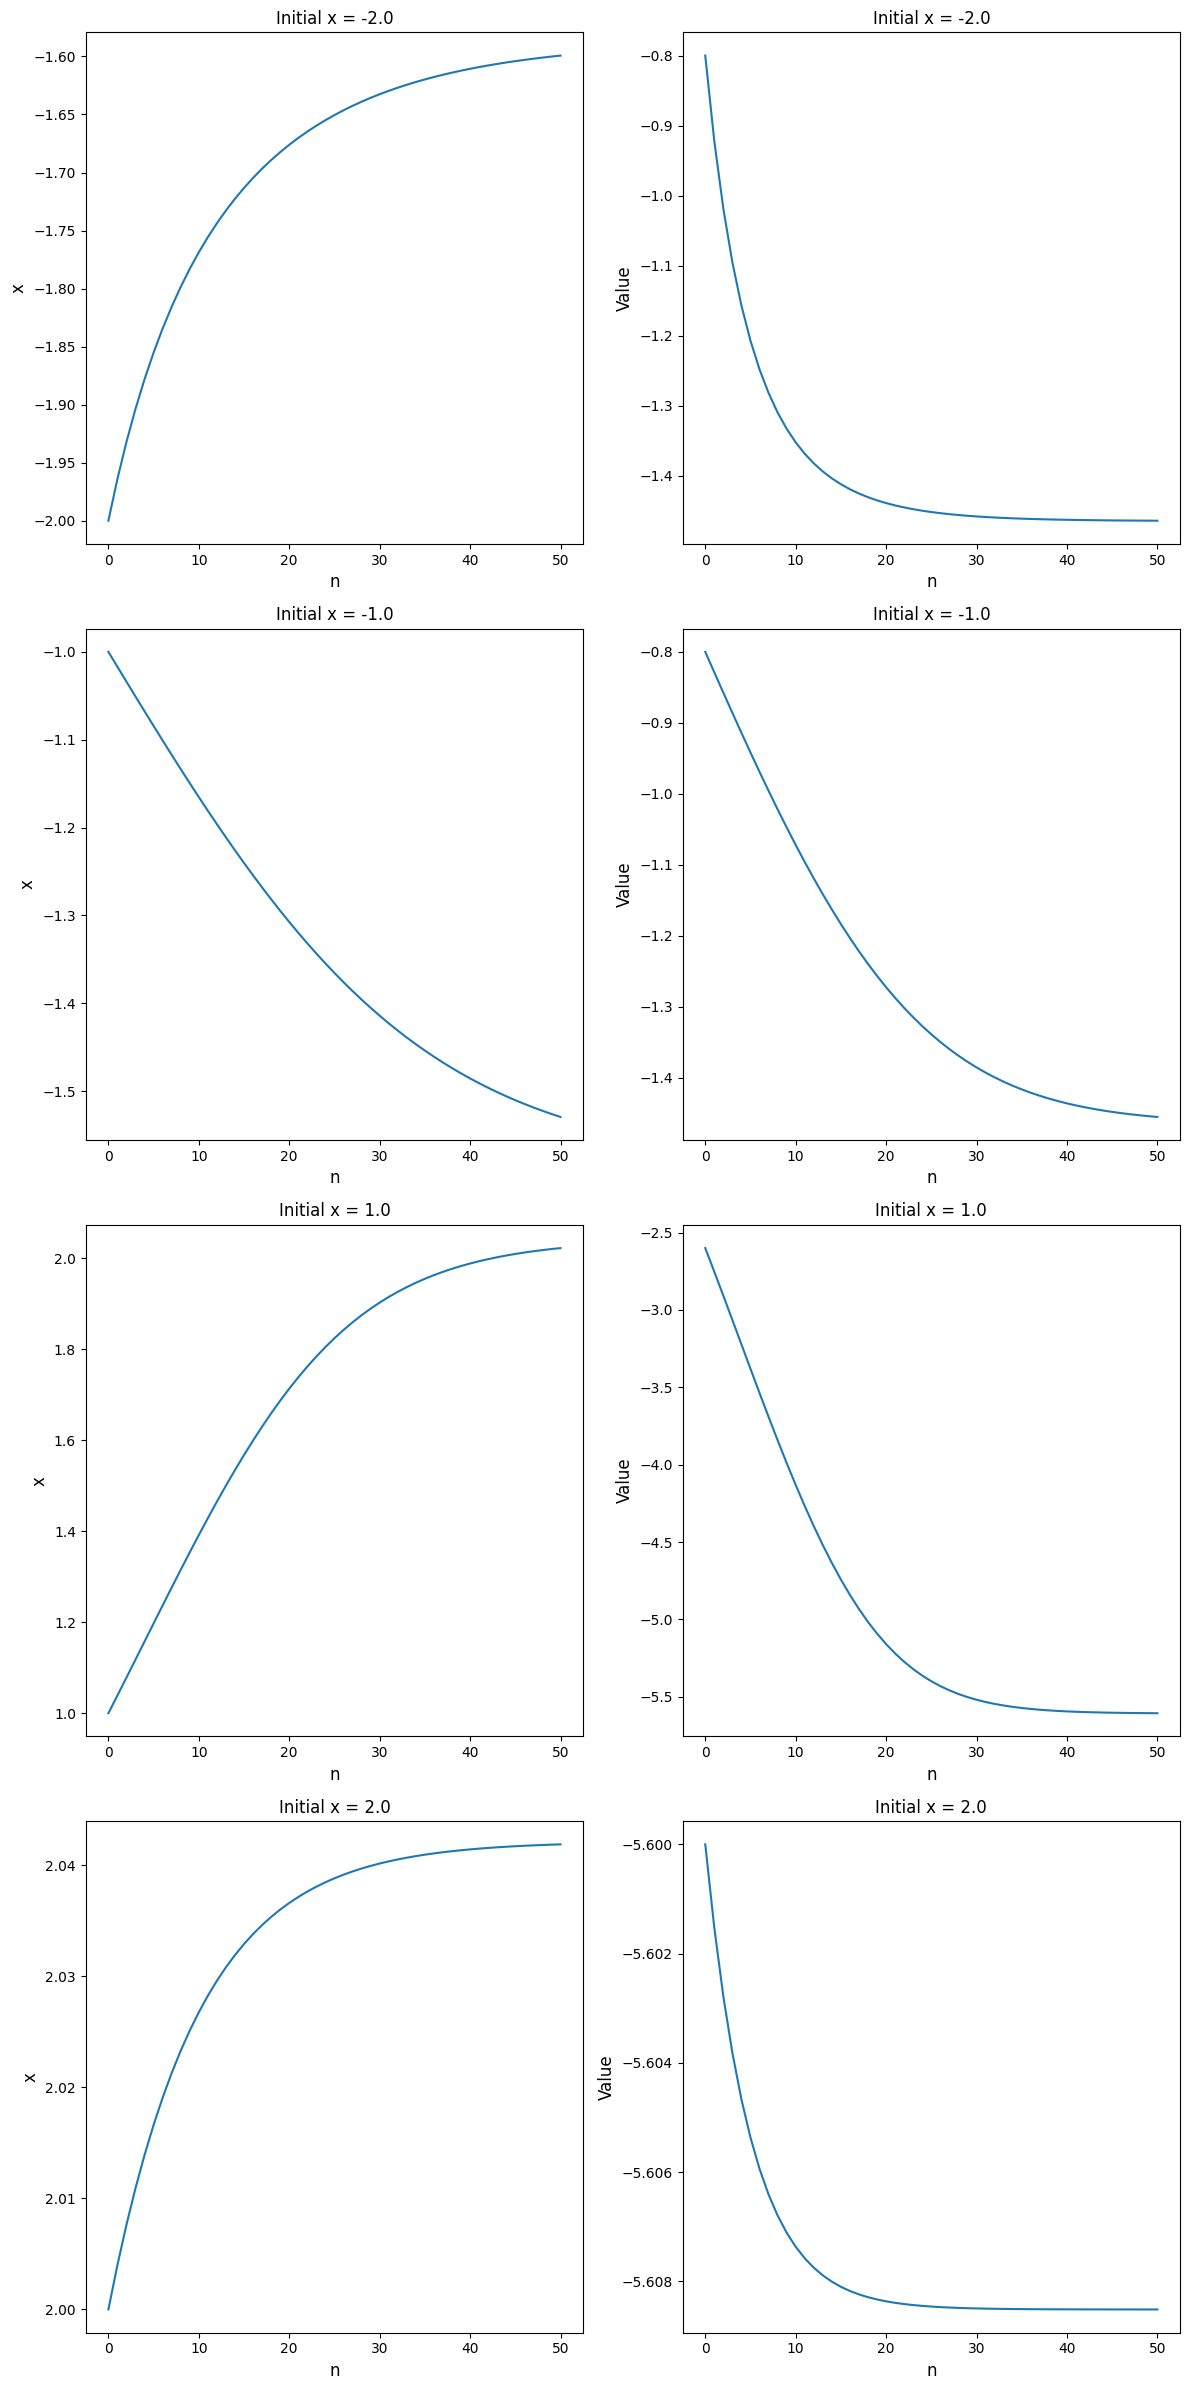

In [155]:
def my_fun(x):
    return 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x

def grad_fun(x):
    return 1.2 * x**3 - 0.3 * x**2 - 4 * x - 0.8

def grad_descent_step(x, alpha):
    return x - alpha * grad_fun(x)

def gradient_descent(x_init, alpha, num_iterations):
    X = [x_init]
    FUN_VAL = [my_fun(x_init)]
    
    for n in range(num_iterations):
        x_new = grad_descent_step(X[-1], alpha)
        X.append(x_new)
        FUN_VAL.append(my_fun(x_new))
    
    return X, FUN_VAL

initial_values = [-2.0, -1.0, 1.0, 2.0]
alpha = 0.01
num_iterations = 50

fig, ax = plt.subplots(len(initial_values), 2, figsize=(12, 6 * len(initial_values)))

for i, x_init in enumerate(initial_values):
    X, FUN_VAL = gradient_descent(x_init=x_init, alpha=alpha, num_iterations=num_iterations)
    
    ax[i, 0].plot(range(num_iterations + 1), X)
    ax[i, 0].set_title(f'Initial x = {x_init}')
    ax[i, 0].set_xlabel('n', size=12)
    ax[i, 0].set_ylabel('x', size=12)
    
    ax[i, 1].plot(range(num_iterations + 1), FUN_VAL)
    ax[i, 1].set_title(f'Initial x = {x_init}')
    ax[i, 1].set_xlabel('n', size=12)
    ax[i, 1].set_ylabel('Value', size=12)

plt.tight_layout()
plt.show()

## Template for Assignment 2

#### Implement Gradient Descent Algorithm for House Price Prediction

This is a template for Assignment 2 of **Optimization and Linear Regression using Gradient Descent** (Monday of Week 8).

Fill in the **None** part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal in this assignment is to build a linear regression model to predict the house price based on its size.

In [156]:
# Put your code here (1 line of code)
# Load the dataset
data = pd.read_csv("../Block_B/Week_8/house-prices.csv")

In [157]:
# Put your code here (1 line of code)
# Take a look at the data, use head method for data
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [158]:
# Select the size and price values from the dataset and assign them to 
# variables X and Y
X_dat = data['SqFt'].to_numpy()
Y_dat = data['Price'].to_numpy()

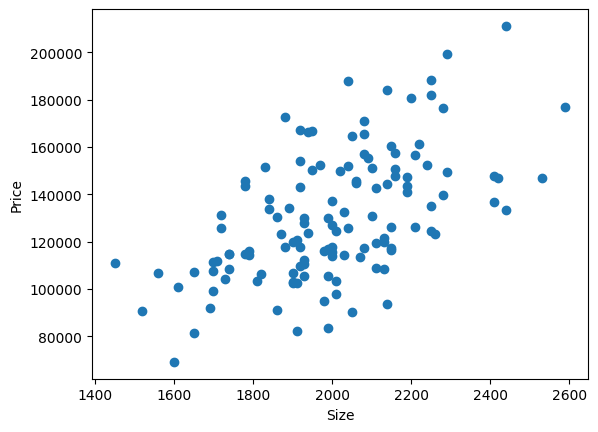

In [159]:
# Put your code here (1 line of code)
# Plot a scatter plot for X_dat and Y_dat
# Take alook at our data
plt.scatter(X_dat, Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

It is always good practice to normalize our data to increase the convergence rate of the Gradient Descent algorithm.

In [160]:
# Normalize our data
X = (np.max(X_dat) - X_dat)/(np.max(X_dat) - np.min(X_dat)) 
Y = (np.max(Y_dat) - Y_dat)/(np.max(Y_dat) - np.min(Y_dat)) 

Now that our data is prepared, let's start creating the necessary functions to implement the Gradient Descent algorithm.

#### Linear Regression Model

At first step, we need to define our linear regression model. The model is as follows:

$$y=wx+b$$

In [161]:
# Define the linear regression model
def LR_model(x, w, b):
    # x: a scalar value, the size of the house
    # w: the weight of the model, a scalar value
    # b: the intercept of the model, a scalar value
    
    # Put your code here (1 line of code)
    # Define the linear regression model
    y = w * x + b
    
    return y

### Cost Function

Now, we need to define the cost function. The cost function is a mean squared error function. 

The mean squared error cost function for our linear regression can be formulated as:

$$J(w,b)=\dfrac{1}{2m} \sum_{i=1}^{m} {\left(\hat y^{(i)} - y^{(i)}\right)^2}= \dfrac{1}{2m} \sum_{i=1}^{m} {\left(wx+b - y^{(i)}\right)^2}$$



In [162]:
# Implement the cost function (mean squared error function)
def cost(X, Y, w, b):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    
    # Number of the observations
    m = len(X)
    
    # Cost value
    
    # Put your code here (1 line of code)
    # Initilize the sum as zero 
    J = 0
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Put your code here (1 line of code)
        # Use LR_model to compute the prediction of the price based on the size
        y_pred = LR_model(x, w, b)
        
        # Put your code here (1 line of code)
        # Compute the cost function (mean squared error cost function)
        J = J + (y_pred - y) ** 2
    
    # Calculate the mean squared error
    J = J / (2 * m)
    
    return J
    

To make sure that you have correctly implemented the cost function, run the following cell and compare the obtained result with the given value. 

In [163]:
# Use your function to compute the cost for the following values
cost(X, Y, 2, 3)

6.050766241298438

The expected value is: 6.050766241298438

#### Gradient Descent Update Rule

Now you need to implement the Gradient Descent update rule as follows:

$$ \qquad \left\{ \begin{array}{l} w_{n+1} = w_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)x^{(i)} \\ b_{n+1} = b_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) \end{array} \right.$$


Here, $\alpha$ is the learning rate, $m$ is the number of the observations. Note that you are able to compute $\hat{y}^{(i)}$ using your previously developed function **LR_model**.

In [164]:
def grad_descent_step(X, Y, w, b, alf):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    # alf: learning rate (a scalar value)
    
    # Number of the observations
    m = len(X)
    
    # Put your code here (2 lines of code)
    # Initilize both sum_w and sum_b as zero
    sum_w = 0
    sum_b = 0
    
    # A for loop to compute the sums appear in the update rule
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Put your code here (1 line of code)
        # Use your LR_model to compute a prediction with x, w, b
        y_pred = LR_model(x, w, b)
        
        # Put your code here (2 lines of code)
        # Compute the sums appear in the update rule
        sum_w = sum_w + (y_pred - y) * x
        sum_b = sum_b + (y_pred - y)
    
    # Put your codes here (2 lines of code)
    # Implement the update rule for the gradien descent
    w_new = w - (alf / m) * sum_w
    b_new = b - (alf / m) * sum_b 
    
    return w_new, b_new

Now that you have implemented the Gradient Descent update rule, to ensure its correctness, run the following cell and compare your result with the provided one.

In [165]:
grad_descent_step(X, Y, 2, -3, 0.01)

(2.0126078237441893, -2.97465021756207)

The expected values are as follows:
    
(2.0126078237441893, -2.97465021756207)

### Implement Gradient Descent Algorithm

Now, it is time to implement the Gradient Descent algorithm using your already developed functions.

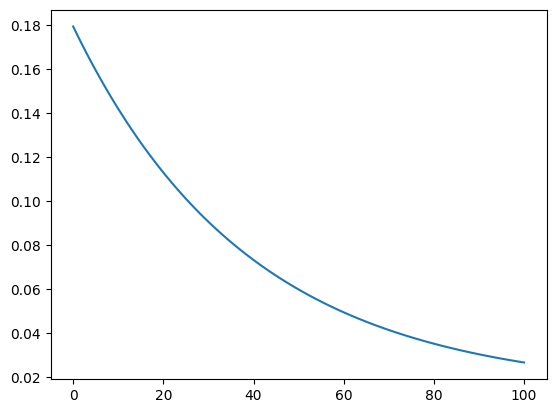

In [166]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 0

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 0

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 100

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Put your code here (1 line of code)
# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Put your code here (1 line of code)
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Put your code here (2 lines of code)
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Put your code here (1 line of code)
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, w_new, b_new)

# Plot the results
plt.plot(range(N+1),C)
plt.show()

Now, plot the obtained results:

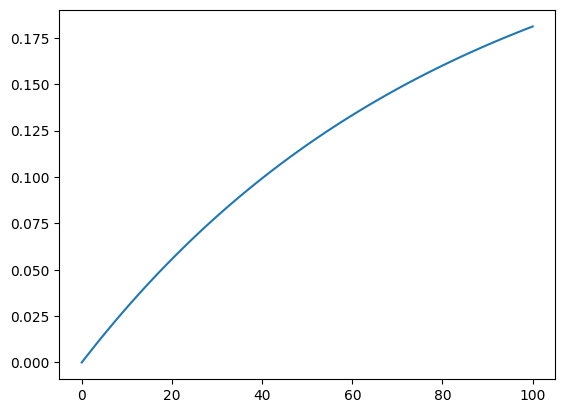

In [167]:
# Put your code here (1 line of code)
# Plot the saved values of W against the iteration.
plt.plot(range(N + 1), W)

plt.show()

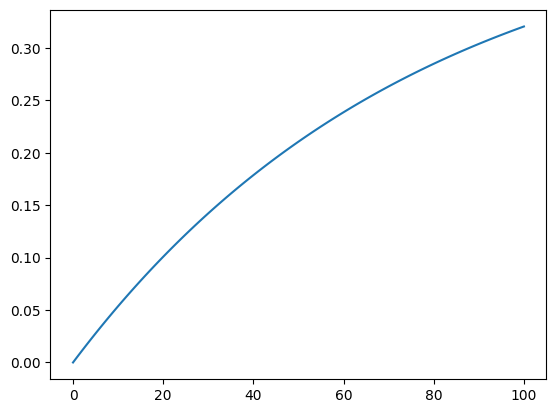

In [168]:
# Put your code here (1 line of code)
# Plot the saved values of B against the iteration.
plt.plot(range(N + 1), B)

plt.show()

In [169]:
# Put your code here (2 lines of code)
# Define the final values (optimal values) of w and b
w_opt = W[-1]
b_opt = B[-1]

print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

The optimal value for w: 0.18113451764787447
The optimal value for b: 0.3204031680251432


Since we initially normalized the data, in this section, we inverse the normalization to represent the model using the initial values of the data.

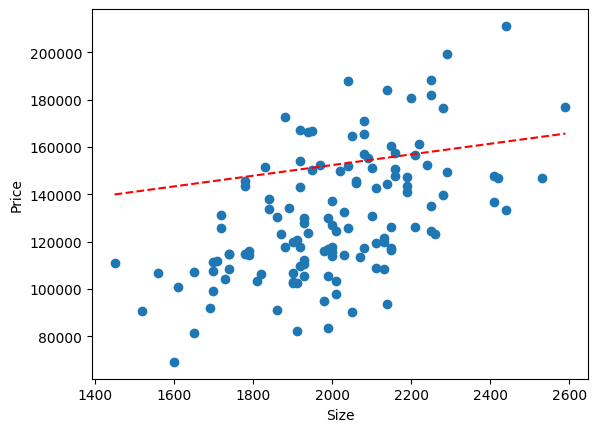

In [170]:
X_max = np.max(X_dat)
X_min = np.min(X_dat)

Y_max = np.max(Y_dat)
Y_min = np.min(Y_dat)

X_line = np.linspace(X_min, X_max, 100)
Y_line_norm = w_opt * (X_max - X_line)/(X_max - X_min) + b_opt
Y_line = Y_max - Y_line_norm * (Y_max - Y_min) 
plt.plot(X_line,Y_line, 'r--')


plt.scatter(X_dat,Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show() 

#### Compare with Scikit-learn

Congratulations! You have finished building a linear regression model from scratch. Perhaps you are curious to compare your model with the one obtained using the Scikit-learn package. In what follows, you will train the same model using Scikit-learn, and you can compare your model with that one.

In [171]:
reg = LinearRegression().fit(X.reshape(-1,1), Y)

In [172]:
print("The optimal value for w:", reg.coef_)

The optimal value for w: [0.563392]


In [173]:
print("The optimal value for b:", reg.intercept_)

The optimal value for b: 0.2773044733289968


### Evaluate the impact of learning rate on the obtained values for w and b. Does the algorithm consistently converge to the same solution, regardless of the initial values for w, b?

In [174]:
learning_rates = [0.001, 0.01, 0.1]
initial_values = [(0, 0), (1, 1), (-1, -1)]

for alf in learning_rates:
    for w_init, b_init in initial_values:
        W = np.zeros(N + 1)
        B = np.zeros(N + 1)
        C = np.zeros(N + 1)

        W[0] = w_init
        B[0] = b_init
        C[0] = cost(X, Y, w_init, b_init)

        for n in range(N):
            w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
            W[n+1] = w_new
            B[n+1] = b_new
            C[n+1] = cost(X, Y, w_new, b_new)

        print(f"Learning Rate: {alf}, Initial Values: (w={w_init}, b={b_init})")
        print("Final Cost:", C[-1])
        print("Optimal w:", W[-1])
        print("Optimal b:", B[-1])
        print("---------------------------------")

Learning Rate: 0.001, Initial Values: (w=0, b=0)
Final Cost: 0.1420983126351419
Optimal w: 0.02945392898050335
Optimal b: 0.05337387555283833
---------------------------------
Learning Rate: 0.001, Initial Values: (w=1, b=1)
Final Cost: 0.36326238428845986
Optimal w: 0.9525571800648068
Optimal b: 0.9109138888381547
---------------------------------
Learning Rate: 0.001, Initial Values: (w=-1, b=-1)
Final Cost: 1.7310181239905347
Optimal w: -0.8936493221037999
Optimal b: -0.8041661377324785
---------------------------------
Learning Rate: 0.01, Initial Values: (w=0, b=0)
Final Cost: 0.026732832820512236
Optimal w: 0.18113451764787447
Optimal b: 0.3204031680251432
---------------------------------
Learning Rate: 0.01, Initial Values: (w=1, b=1)
Final Cost: 0.047171313540438645
Optimal w: 0.7131982642013854
Optimal b: 0.4624792317730008
---------------------------------
Learning Rate: 0.01, Initial Values: (w=-1, b=-1)
Final Cost: 0.18986190809147147
Optimal w: -0.35092922890563627
Optima

### Determine the best learning rate value for training the model. Explain why you consider that value the best.

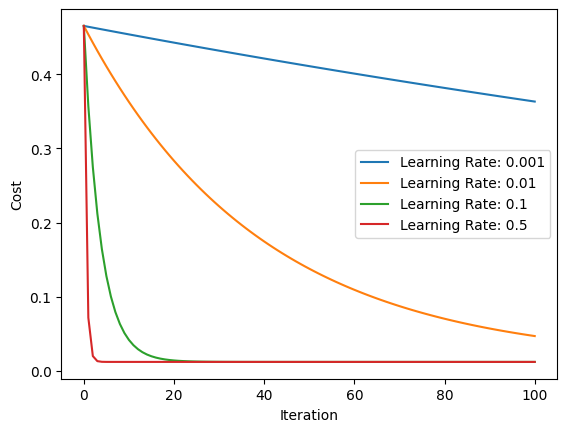

In [175]:
learning_rates = [0.001, 0.01, 0.1, 0.5]
N = 100

for alf in learning_rates:
    W = np.zeros(N + 1)
    B = np.zeros(N + 1)
    C = np.zeros(N + 1)

    W[0] = 1
    B[0] = 1
    C[0] = cost(X, Y, W[0], B[0])

    for n in range(N):
        w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
        W[n+1] = w_new
        B[n+1] = b_new
        C[n+1] = cost(X, Y, w_new, b_new)

    plt.plot(range(N + 1), C, label=f'Learning Rate: {alf}')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

#### I think the best learning rate is 0.01 because it seems to offer a nice balance between converging quickly and remaining stable.

### Assignments for "DataLab: Linear Regression with Gradient Descent"

This task is associated with the "Good" and "Excellent" criteria in ILO 7.0. 

Complete the assignment at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/30.LinearRegressionGradientDescentDataLab.html). Then put your code in the following cell.

#### Implementing Linear Regression for NAC Dataset

In [176]:
independent_variables = []
for i in nacdata.columns:
    if i[-1] == "0":
        independent_variables.append(i)
#print(independent_variables)

X = nacdata[independent_variables].to_numpy()
y = nacdata["Market value"].to_numpy()

X = (np.max(X, axis=0) - X)/(np.max(X, axis=0) - np.min(X, axis=0)) 
y = (np.max(y, axis=0) - y)/(np.max(y, axis=0) - np.min(y, axis=0)) 

In [177]:
# Define the number of observations and the features (predictors)
# m denotes the number of observations
m = X.shape[0]

# p denotes the number of features
p = X.shape[1]

You have to add 1 to the related row for each observation; i.e. we need to change X to the following form:

$$ X= \left[ \begin{array}{ccccc} 1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_p^{(1)}  \\  1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_p^{(2)} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_p^{(m)}  \end{array} \right]$$

In [178]:
# Put your code here (1 line of code)
# Add 1 to each row of X (you can use np.insert)
X = np.insert(X, 0, 1, axis=1)

print(X)

[[1.         0.70693548 0.44536585 ... 1.         1.         1.        ]
 [1.         0.63403226 0.76634146 ... 0.91275168 0.74796748 0.98525799]
 [1.         0.60354839 0.29902439 ... 1.         1.         1.        ]
 ...
 [1.         0.60048387 0.66292683 ... 0.93736018 0.77235772 1.        ]
 [1.         0.61903226 0.56292683 ... 1.         1.         1.        ]
 [1.         0.70354839 0.48878049 ... 0.81879195 1.         0.68427518]]


To proceed further, you need to increase the dimension of Y from 1 to 2 in the following cell:

In [179]:
y = y.reshape(-1,1)

print(y)

[[0.98333333]
 [0.98333333]
 [0.98333333]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]


Use **np.random.seed** to set the seed for the NumPy pseudo-random number generator. The pseudo-random number generator produces sequences of numbers that appear random, but they are actually determined by an initial seed value. By setting the seed, you ensure that you get reproducible results when generating random numbers. Don't change the seed number in the following cell.

In [180]:
np.random.seed(1979)

#### Initilize Parameters

Initialize the model parameters with random values. Write a function to initialize the parameters with random values. Note that, due to having an intercept in the linear regression model, the number of parameters should be $p+1$.

In [181]:
def Init_param(p):
    # p (scalar): number of parameters
    
    # Output:
    # W: 1-dimensional numpy array
    
    # Put your code here (1 line of code)
    # Use np.random.rand to initialize the parameters
    # Note that W should have p+1 parameters
    W = np.random.rand(p+1)
    
    return(W)

Now, let's check your **Init_param** function. Run the followng cell:

In [182]:
Init_param(3)

array([0.97820931, 0.75000953, 0.55963445, 0.10992111])

The expected value is as follows:

array([0.97820931, 0.75000953, 0.55963445, 0.10992111])

#### Define Linear Regression Model

In this section, you will define your linear regression model. The model is as follows:

$$y = xW$$

In [183]:
def LR_model(x, W):
    
    # x: 1-dimensional numpy array containing the features (predictors)
    # W: 1-dimensional numpy array containg the weights of the model
    x = np.insert(x, 0, 1)
    W = np.expand_dims(W, axis=1)
    
    # Put your code here (1 line of code)
    # Implement the linear regression model
    y = np.dot(x, W)
    
    return y

Now, let's check **LR_model** that you have already implemented. Run the following cell:

In [184]:
w = np.array([0.8, 0.7 , -0.5 , 0.3])
x = np.array([0.33,    0.5,    0.7])
LR_model(x, w)

array([0.991])

The expected output is: **array([0.991])**

#### Compute Cost Function

In this section, you are supposed to write a function to calculate the cost function. It is better to implement the vectorized form. Actually, you need to implement the following cost function:

$$J(W)=\dfrac{1}{2m}(XW-Y)^\top(XW-Y)$$

In [185]:
def cost_fun(X,Y,W):
    # X: a 2-dimensional numpy array containg all the features 
    # Y: a 2-dimensional numpy array containing all the response variables
    # W: 1-dimensional numpy array containg the weights of the model
    
    # Define the number of observations
    m = X.shape[0]
    
    # expand the dimension to be able to perform the matrix multiplication
    W = np.expand_dims(W, axis=1)
    
    # Put your code here (1 line of code)
    # Define the cost function using the vectorized form
    J = (1 / (2 * m)) * np.sum((np.dot(X, W) - Y)**2)
    
    
    return np.squeeze(J)

Now, let's check your already developed **cost_fun** function by running the following cell. Compare your result with the expected value. 

In [186]:
X1 = np.array([[1.        , 0.70175439, 1.        , 1.        ],
              [1.        , 0.49122807, 0.33333333, 1.        ],
              [1.        , 0.74561404, 0.66666667, 1.        ]])
          
Y1 = np.array([[0.68191414],
              [0.68261787],
              [0.6783955 ]])
          
W1 = np.array([3, 2, -1, 5])
cost_fun(X1,Y1,W1)

31.574707296127873

The expected value is: **array(31.5747073)**

#### Gradient Descent Update Rule

Now, you can implement Gradient Descent update rule utilizing your previousely developed functions. Actually, you have to implement the following rule here:

$$W := W - \alpha \dfrac{1}{m}X^\top(XW-Y)$$

In [187]:
def grad_descent_step(X, Y, W, alf):
    
    # Define the number of observations
    m = X.shape[0]
    
    # Add one dimension to make the matrix multiplication possible
    W = np.expand_dims(W, axis=1)
    
    # Calculate the gradient of the cost function
    gradient = (1 / m) * np.dot(X.T, (np.dot(X, W) - Y))

    # Put your code here (1 line of code)
    # Implement the update rule
    W_new = W - alf * gradient
    
    return np.squeeze(W_new)

Now, let's check the **grad_descent_step** function. Run the following cell and compare the obtained result with the expected one.

In [188]:
X2 = np.array([[1.        , 0.70175439, 1.        , 1.        ],
              [1.        , 0.49122807, 0.33333333, 1.        ],
              [1.        , 0.74561404, 0.66666667, 1.        ]])
          
Y2 = np.array([[0.68191414],
              [0.68261787],
              [0.6783955 ]])

W2 = np.array([3, 2, -1, 5])

grad_descent_step(X2, Y2, W2, alf=0.001)

array([ 2.99205524,  1.99486469, -1.00526929,  4.99205524])

The expected value is as follows:

**array([ 2.99205524,  1.99486469, -1.00526929,  4.99205524])**

#### Implement Gradient Descent Algorithm

Now, it is time to put together all the previously developed functions to build a linear regression model from scratch.

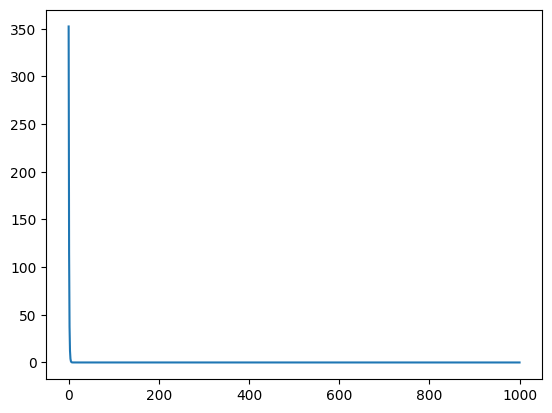

In [189]:
# Put your code here (1 line of code)
# Choose an initial value for model parameters, use Init_param function
w_init = Init_param(p)

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 1000

# Save the values for W and the COST values
W = np.zeros((p + 1, N+1))

COST = np.zeros(N + 1)

# Save initial values
W[:,0] = np.squeeze(w_init)
COST[0] = cost_fun(X, y, w_init)

# This is for loop to implement the Gradient Descent algorithm
for n in range(N):
    
    # Put your code here (1 line of code)
    # Use grad_descent_step to update the values for w
    w_new = grad_descent_step(X, y, W[:, n], alf)
    
    # Save the new value for w
    W[:, n + 1] = w_new
    
    # Put your code here (1 line of code)
    # Save the cost value for newly obtained w using the cost_fun
    COST[n+1] = cost_fun(X, y, w_new)

# Plot the results
plt.plot(range(N+1),COST)
plt.show()

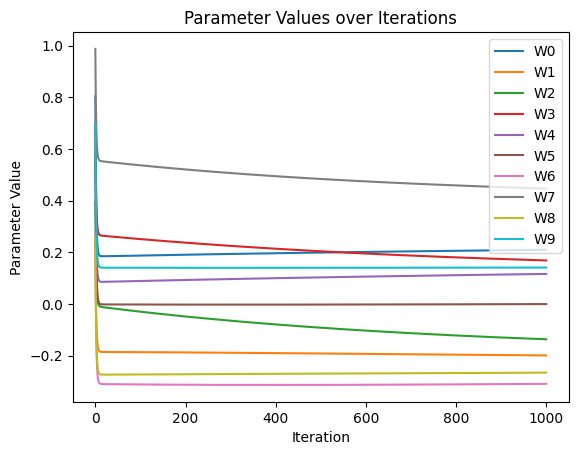

In [190]:
# Illustrate W against iteration in this cell
# Plot the results for each parameter in W
first_10_variables = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in first_10_variables:
    plt.plot(range(N+1), W[i, :], label=f'W{i}')
 
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Parameter Values over Iterations')
plt.legend()
plt.show()

#### Compare with Scikit-learn

Congratulations! You have finished building a linear regression model from scratch for the NAC dataset. Perhaps you are curious to compare your model with the one obtained using the Scikit-learn package. In what follows, you will train the same model using Scikit-learn, and you can compare your model with that one.

In [191]:
reg = LinearRegression().fit(X, y)

In [192]:
reg.coef_

array([[ 3.67115292e-17,  2.23193705e-02,  2.19585458e-02,
        -2.77048356e-02, -1.05085998e-02, -5.64127771e-03,
        -1.23870312e-02, -2.27479057e-03, -5.94687933e-03,
        -1.67490936e-03, -5.13641525e-03,  1.63565171e-02,
         3.77763826e-02, -2.55008497e-02,  2.72508060e-02,
        -3.22435897e-03, -1.52829223e-02,  6.33839116e-03,
        -1.25462783e-01,  9.80426890e-02,  7.73395454e-02,
        -1.71259729e-03, -8.79801722e-03, -1.55355018e-02,
         1.24984860e-02,  1.11764944e-02,  6.45637782e-02,
        -1.00938256e-02, -4.85933413e-03,  2.56553768e-01,
        -2.23457500e-02, -1.74032941e-02, -3.68551818e-02,
        -2.23892908e-01, -4.51599948e-02,  1.25642967e-02,
        -1.15010934e-02,  8.35687607e-03,  8.61553550e-03,
         2.61134351e-03,  1.13626119e-02,  1.10871038e-02,
        -1.16091817e-02,  1.22638492e-03,  2.15628751e-02,
         1.30601981e-02, -1.42937357e-02, -1.19942992e-01,
         2.69276634e-02,  1.06712345e-01, -8.41070930e-0

In [193]:
reg.intercept_

array([0.91743556])

Note that in our model intercep value is saved in **W[0, :]**. 

### Regularised Linear Regression Implementation

In [194]:
def scale_features(x):
    # Standardize features by subtracting mean and dividing by standard deviation
    mean = np.mean(x)
    std_dev = np.std(x)
    scaled_x = (x - mean) / std_dev
    return scaled_x, mean, std_dev

def LR_model(x, W, lambda_reg):
    # x: 1-dimensional numpy array containing the features (predictors)
    # W: 1-dimensional numpy array containing the weights of the model
    # lambda_reg: regularization parameter
    
    x, mean, std_dev = scale_features(x)
    
    x = np.insert(x, 0, 1)
    W = np.expand_dims(W, axis=1)
    
    # Implement the linear regression model
    y = np.dot(x, W)
    
    # Calculate the L2 regularization term
    regularization_term = 0.5 * lambda_reg * np.sum(W[1:]**2)
    
    # Add the regularization term to the model output
    y += regularization_term
    
    return y, mean, std_dev

def cost_function(x, y, W, lambda_reg):
    m = len(y)
    predictions = np.dot(x, W)
    error = predictions - y
    
    # Compute the mean squared error
    mse = np.mean(error**2)
    
    # Calculate the L2 regularization term
    regularization_term = 0.5 * lambda_reg * np.sum(W[1:]**2)
    
    # Add the regularization term to the cost function
    cost = mse + regularization_term
    
    return cost

def gradient_descent(x, y, W, alpha, lambda_reg, num_iterations):
    m = len(y)
    
    for _ in range(num_iterations):
        predictions = np.dot(x, W)
        error = predictions - y
        
        # Update weights for the intercept term
        W[0] -= (alpha / m) * np.sum(error)
        
        # Update weights for the other terms with regularization
        W[1:] -= (alpha / m) * (np.dot(x[:, 1:].T, error) + lambda_reg * W[1:])
        
        # Calculate the cost with the updated weights
        cost = cost_function(x, y, W, lambda_reg)
        
        # Print the cost for every 100 iterations
        if _ % 100 == 0:
            print(f'Iteration {_}, Cost: {cost}')
    
    return W

#### Hyperparameter Tunning

In [195]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform feature scaling and train the model
def train_model(X_train, y_train, alpha, lambda_reg, num_iterations):
    # Initialize weights
    W = np.zeros(X_train.shape[1] + 1)
    
    # Train the model using gradient descent
    W = gradient_descent(X_train, y_train, W, alpha, lambda_reg, num_iterations)
    
    return W

# Define the hyperparameter settings
learning_rates = [0.01, 0.1, 0.5]
regularization_strengths = [0.1, 1, 10]

# Train models for different hyperparameter settings
for lr in learning_rates:
    for reg_strength in regularization_strengths:
        # Create and train a Ridge regression model
        model = Ridge(alpha=reg_strength / (2 * lr), max_iter=1000, tol=1e-3)
        model.fit(X_train, y_train)

        # Make predictions on the training set
        y_pred = model.predict(X_train)

        # Calculate the mean squared error
        mse = mean_squared_error(y_train, y_pred)

        # Print or store the results
        print(f"Learning Rate: {lr}, Regularization Strength: {reg_strength}, MSE: {mse}")

Learning Rate: 0.01, Regularization Strength: 0.1, MSE: 0.000514195845191044
Learning Rate: 0.01, Regularization Strength: 1, MSE: 0.00051857172928431
Learning Rate: 0.01, Regularization Strength: 10, MSE: 0.0005327422105946707
Learning Rate: 0.1, Regularization Strength: 0.1, MSE: 0.0005130190096619422
Learning Rate: 0.1, Regularization Strength: 1, MSE: 0.000514195845191044
Learning Rate: 0.1, Regularization Strength: 10, MSE: 0.00051857172928431
Learning Rate: 0.5, Regularization Strength: 0.1, MSE: 0.0005128652033794242
Learning Rate: 0.5, Regularization Strength: 1, MSE: 0.000513171691495296
Learning Rate: 0.5, Regularization Strength: 10, MSE: 0.0005150840141515459
